# Loan Data from Prosper Exploration
## by Kaori Ishikawa

## Preliminary Wrangling

This document explores a datasets containing approximately 114,000 loans data from Prosper, a peer-to-peer lending platform, including loan amount, borrower rate, current loan status and so on.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# Overview of the data shape and composition
print(df_loan.shape)
df_loan.head(5)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Let's check features
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features. Most of the variables are numeric in nature with some categorical data.


### What is/are the main feature(s) of interest in your dataset?

I'm most intered in figureing out what factors in the dataset affect borrower APR. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that Prosper rating and credit score range will have strong effect on borrower APR. Also, I think that debt to income ratio and employed status have an influence on APR. As there are many features, firstly I will focus on the following 16 features and narrow down in the course of exploration.


>Borrower's credit ratings
>>-**Prosper rating (numeric)**: the  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.<br>
>>-**CreditScoreRangeLower**: the lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.<br>
>>-**CreditScoreRangeUpper**: the upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 

>Borrower's financial information
>>-**IncomeRange**: the income range of the borrower at the time the listing was created.<br>
>>-**StatedMonthlyIncome**: the monthly income the borrower stated at the time the listing was created.<br>
>>-**DebtToIncomeRatio**: the debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).<br>
>>-**CurrentDelinquencies**: number of accounts delinquent at the time the credit profile was pulled.<br>
>>-**AmountDelinquent**: dollars delinquent at the time the credit profile was pulled.<br>
>>-**PublicRecordsLast12Months**: number of public records in the past 12 months at the time the credit profile was pulled.<br>
>>-**BankcardUtilization**: the percentage of available revolving credit that is utilized at the time the credit profile was pulled.<br>

>Borrower's other information
>>-**EmploymentStatus**: the employment status of the borrower at the time they posted the listing.<br>
>>-**IsBorrowerHomeowner**: a Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.<br>

>Loan information
>>-**LoanStatus**: the current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.<br>
>>-**LoanOriginalAmount**: the origination amount of the loan.<br>
>>-**BorrowerAPR**: the Borrower's Annual Percentage Rate (APR) for the loan.<br>
>>-**ListingCategory (numeric)**: the category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans


In [5]:
# Let's drop features which is outside of my interest.

keep_col = ['BorrowerAPR', 'ProsperRating (numeric)', 'CreditScoreRangeLower', 'CreditScoreRangeUpper','IncomeRange', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 
            'CurrentDelinquencies', 'AmountDelinquent', 'PublicRecordsLast12Months', 'BankcardUtilization', 'EmploymentStatus', 'IsBorrowerHomeowner', 
           'LoanStatus',  'LoanOriginalAmount', 'ListingCategory (numeric)']
df_loan = df_loan[keep_col]

In [6]:
df_loan.shape

(113937, 16)

## Univariate Exploration

Now I have only 16 columns. I'll start by looking at the distribution of variable.

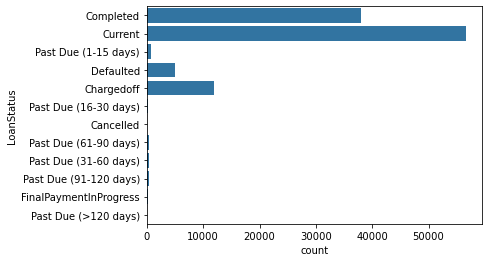

In [7]:
# First off, let's check the loan status just to have an idea of the dataset.

base_color = sb.color_palette()[0]
sb.countplot(data = df_loan,  y = 'LoanStatus', color = base_color);

Over 50,000 loans are still ongoing and the completed loans are less than 40,000. Defaulted loans are around 5,000.

Now let's look at credit rating features. I'd like to check the credit score range, but I am not yet sure if I should use a lower or higher score range. Therefore, firstly I will make a new feature contains the gap between two scores and have a closer look.

In [8]:
# make a column contains the difference between higher and lower score range

df_loan['CreditScoreRangeGap'] = df_loan['CreditScoreRangeUpper'] - df_loan['CreditScoreRangeLower']
df_loan['CreditScoreRangeGap'].describe()

count    113346.0
mean         19.0
std           0.0
min          19.0
25%          19.0
50%          19.0
75%          19.0
max          19.0
Name: CreditScoreRangeGap, dtype: float64

This shows the gap is always 19. As there is no large difference between the upper and lower score range, I will use the lower score for further analysis. I will drop CreditScoreRangeUpper column.

In [9]:
# drop credit score range upper and the range gap

df_loan = df_loan.drop(['CreditScoreRangeUpper', 'CreditScoreRangeGap'], axis=1)

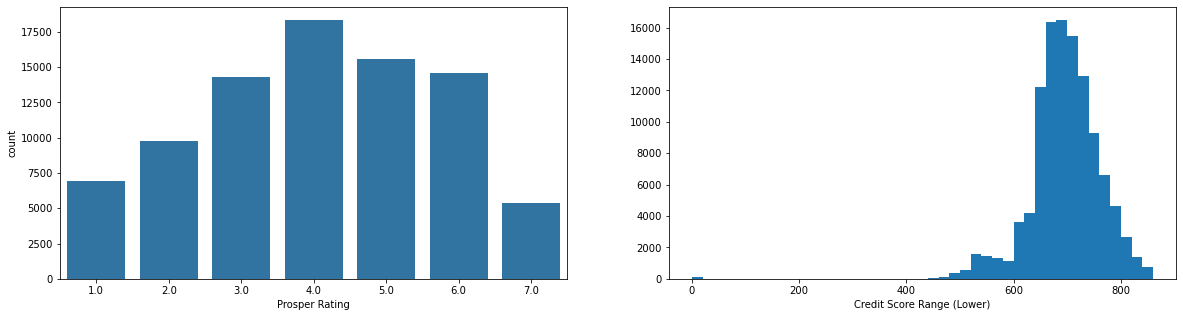

In [10]:
# Next, let's plot Prosper Rating and credit score

plt.figure(figsize = [20,5])


plt.subplot(1,2,1)
sb.countplot(data = df_loan,  x = 'ProsperRating (numeric)', color = base_color)
plt.xlabel('Prosper Rating');

plt.subplot(1,2,2)
bins_csr = np.arange(0,df_loan.CreditScoreRangeLower.max(), 20 )
plt.hist(data = df_loan,  x = 'CreditScoreRangeLower', color = base_color, bins = bins_csr)
plt.xlabel('Credit Score Range (Lower)');



Prosper rating has a unimodal distribution. After the mode of rating 4, rating 5 and 6 are only slight decrease followed by a significant drop at 7. <br>
Credit score range also shows a unimodal distribution with a few sudden increase on the left side. It shows a more smooth decline on the right side. Also, there are outliers around 0 and I will have a closer look. 

In [12]:
# Check the outlier of credit score range
df_loan[df_loan['CreditScoreRangeLower'] < 300].CreditScoreRangeLower.unique()


array([0.])

Given the nature of credit score, 0 should be treated as N/A.

In [13]:
# replace 0 with N/A
df_loan['CreditScoreRangeLower'] = df_loan['CreditScoreRangeLower'].replace(0, np.nan)

In [14]:
df_loan[df_loan['CreditScoreRangeLower'] < 300]

,BorrowerAPR,ProsperRating (numeric),CreditScoreRangeLower,IncomeRange,StatedMonthlyIncome,DebtToIncomeRatio,CurrentDelinquencies,AmountDelinquent,PublicRecordsLast12Months,BankcardUtilization,EmploymentStatus,IsBorrowerHomeowner,LoanStatus,LoanOriginalAmount,ListingCategory (numeric)


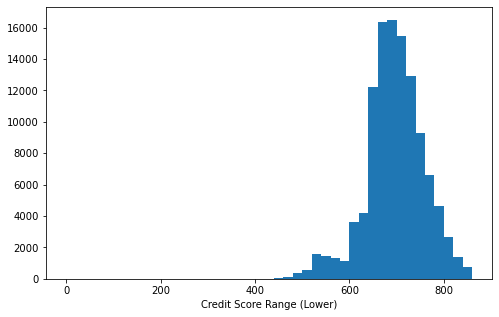

In [19]:
#  re-plot
plt.figure(figsize = [8,5])
ax = plt.hist(data = df_loan,  x = 'CreditScoreRangeLower', color = base_color, bins = bins_csr)
plt.xlabel('Credit Score Range (Lower)');

Now it is cleaned.

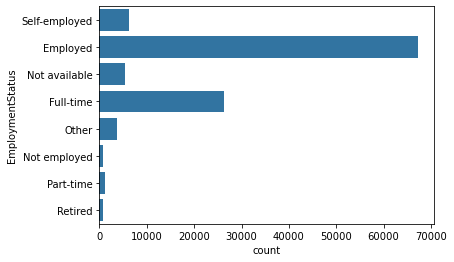

In [20]:
# Next, let's look at employment status
sb.countplot(data = df_loan,  y = 'EmploymentStatus', color = base_color);


In [21]:
df_loan['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

Most of the people in the datasets are employed. I see Full-time and Part-time category are separated from employed. I will include them in "Emplolyed" and will also change 'Not available' into N/A

In [22]:
# update the data
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].replace({'Full-time':'Employed', 'Part-time':'Employed'})

In [23]:
# update the data
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].replace('Not available', np.NaN)

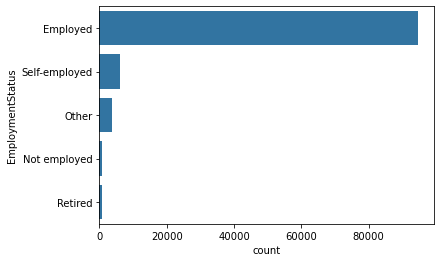

In [24]:
# re-plot
sb.countplot(data = df_loan,  y = 'EmploymentStatus', color = base_color, order = df_loan['EmploymentStatus'].value_counts().index);

Employed is the most frequent status by far. And, Self-employed is the second most frequent status.

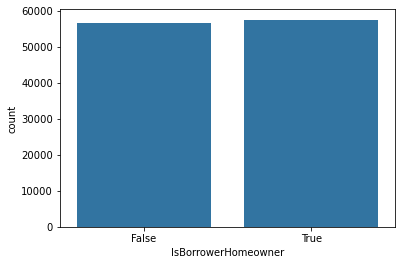

In [25]:
# Next, let's see if borrower is Homeowner or not.
sb.countplot(data = df_loan,  x = 'IsBorrowerHomeowner', color = base_color);


Interestingly, there is no significant diference.

In [26]:
# Next, let's have a look at the income. 
df_loan.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

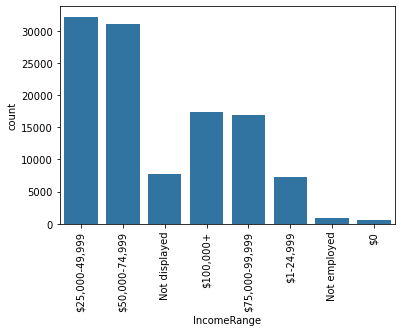

In [29]:
# plot
sb.countplot(data = df_loan, x = 'IncomeRange', color = base_color)
plt.xticks(rotation = 90);

I see "Not employed" and "Not displayed" in the Income range. I will include it in \$0, and chaneg not displayed into NA.

In [30]:
# replace values
df_loan['IncomeRange'] = df_loan['IncomeRange'].replace({'Not displayed':np.nan, 'Not employed':'$0'})

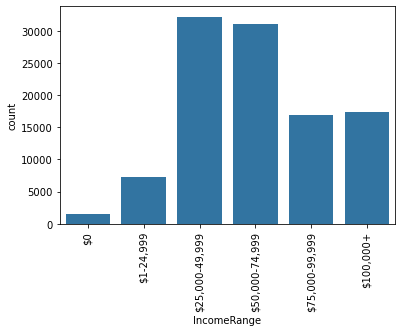

In [31]:
# plot it again in order
order_inc = ['$0', '$1-24,999', '$25,000-49,999','$50,000-74,999', '$75,000-99,999','$100,000+']
sb.countplot(data = df_loan, x = 'IncomeRange', color = base_color, order = order_inc)
plt.xticks(rotation = 90);

Income range of "\\$25,000 - 49,999", and "\\$50,000 - 74,999" are the top 2. The income less than \$24,999 are signifincantly less than the others.

In [34]:
# Now, let's have a look at the stated monthly income.
df_loan.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

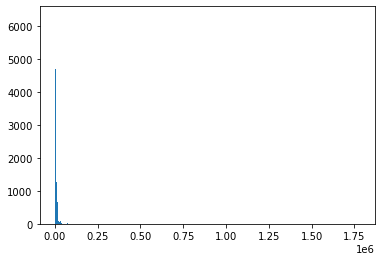

In [47]:
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins = bins);

As it is widely spread, I will first have a look at the outliers.

In [48]:
# filter outliers using criteria eyeballed from the plot.

df_loan[df_loan['StatedMonthlyIncome']> 0.25e6]

,BorrowerAPR,ProsperRating (numeric),CreditScoreRangeLower,IncomeRange,StatedMonthlyIncome,DebtToIncomeRatio,CurrentDelinquencies,AmountDelinquent,PublicRecordsLast12Months,BankcardUtilization,EmploymentStatus,IsBorrowerHomeowner,LoanStatus,LoanOriginalAmount,ListingCategory (numeric)
8066,0.35643,1.0,660.0,"$100,000+",4.166667e+05,0.0,5.0,1612.0,0.0,0.00,Employed,True,Completed,2000,1
17411,0.35643,2.0,660.0,"$100,000+",4.833333e+05,0.0,0.0,0.0,0.0,0.86,Employed,True,Completed,7500,1
53014,0.25785,3.0,720.0,"$100,000+",6.185478e+05,NaN,0.0,0.0,0.0,0.62,Self-employed,True,Completed,4000,3
53167,0.35797,1.0,740.0,"$100,000+",1.750003e+06,NaN,0.0,0.0,0.0,0.61,Self-employed,True,Current,4000,3
57133,0.35643,2.0,680.0,"$100,000+",4.666667e+05,0.0,1.0,639.0,0.0,0.00,Employed,True,Current,4000,2
113270,0.22712,4.0,680.0,"$100,000+",3.944000e+05,0.0,0.0,0.0,0.0,0.54,Employed,False,Current,2000,7


The monthly income are corresponding with each Income range, and it seems correct data. As it is a long-tail distribution, I will transform this into log-scale.

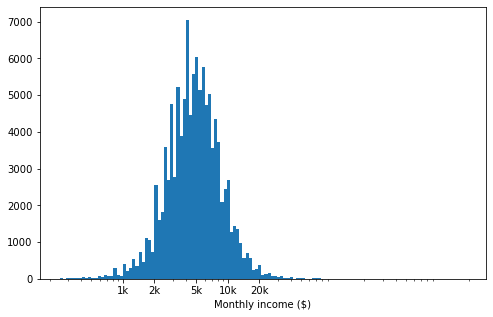

In [51]:
log_binsize = 0.03
bins = 10 ** np.arange(2.4, np.log10(df_loan['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4], ['1k','2k', '5k', '10k', '20k'])
plt.xlabel('Monthly income ($)')
plt.show()

Monthly income is widely spread and has a long-tailed distribution. 
When plotted on a log-scale, the monthly income distribution looks roughly unimodal with several sudden sub-peak. The highest peak is around 4k.

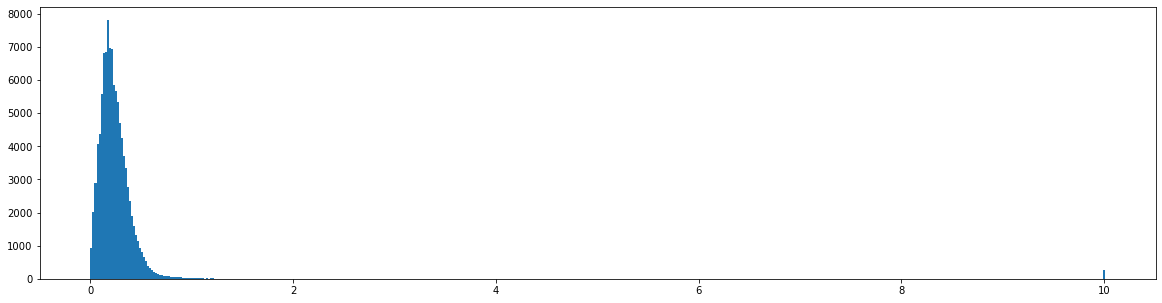

In [324]:
# Next, let's have a look at the debt to income racio
plt.figure(figsize = [20,5])
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', color = base_color, bins = 500);

This initial plot show most of the data to the far left of their axies, suggesting some strong outliers on the right.
Let's take a look to see if they need to be filtered out of the data.

In [325]:
df_loan.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

Minimum is 0 and I am going to replace 0 with N/A later, given the nature of the feature.

In [326]:
# Select high outliers, using criteria eyeballed from the plot.

outliers = (df_loan['DebtToIncomeRatio'] > 1.5)
print(outliers.sum())
df_loan.loc[outliers, :]

555


,ListingNumber,LoanStatus,ProsperRating (numeric),BorrowerAPR,LoanOriginalAmount,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,RevolvingCreditBalance,BankcardUtilization,CurrentDelinquencies,AmountDelinquent,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome
22,706927,Current,1.0,0.35356,4000,1,Other,68.0,False,700.0,10050.0,0.40,0.0,0.0,0.0,10050.0,9.20,"$1-24,999",118.333333
226,104542,Completed,NaN,0.11749,1000,0,Employed,9.0,True,600.0,152934.0,0.61,0.0,0.0,0.0,152934.0,10.01,NaN,0.083333
368,128819,Completed,NaN,0.20735,16000,0,Employed,7.0,False,660.0,9398.0,0.56,0.0,0.0,0.0,9398.0,1.65,"$1-24,999",1083.333333
576,124494,Completed,NaN,0.10505,1500,0,Retired,65.0,False,800.0,1772.0,0.04,0.0,0.0,0.0,1772.0,10.01,"$1-24,999",0.083333
626,560943,Current,1.0,0.35797,2000,1,Employed,51.0,False,700.0,4445.0,0.47,1.0,378.0,0.0,4445.0,10.01,"$1-24,999",3.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113258,627138,Defaulted,4.0,0.27554,4000,2,Employed,172.0,True,780.0,10742.0,0.58,0.0,0.0,0.0,10742.0,10.01,"$1-24,999",2.916667
113367,827764,Completed,1.0,0.35356,2000,13,Other,20.0,True,660.0,8988.0,0.64,0.0,0.0,0.0,8988.0,2.53,"$1-24,999",500.000000
113387,485381,Completed,1.0,0.39153,1500,7,Employed,45.0,True,720.0,1447.0,0.06,0.0,0.0,0.0,1447.0,2.38,"$25,000-49,999",4000.000000
113407,274103,Completed,NaN,0.25163,1386,4,Employed,25.0,True,640.0,725.0,0.37,0.0,0.0,0.0,725.0,2.16,"$1-24,999",233.333333


I see a lot of monthly income of 0.083333. As this is unusual number as a monthly income, I will have a closer look.

In [327]:
df_loan[df_loan.StatedMonthlyIncome < 1 ].StatedMonthlyIncome.unique()

array([0.      , 0.083333, 0.833333, 0.25    ])

In [328]:
# filter the monthly income which is between 0 and 1
df_loan[(0 < df_loan.StatedMonthlyIncome) & (df_loan.StatedMonthlyIncome < 1) ]

,ListingNumber,LoanStatus,ProsperRating (numeric),BorrowerAPR,LoanOriginalAmount,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,RevolvingCreditBalance,BankcardUtilization,CurrentDelinquencies,AmountDelinquent,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome
146,31745,Completed,NaN,0.09939,4000,0,NaN,NaN,False,740.0,NaN,NaN,0.0,NaN,NaN,NaN,0.07,NaN,0.083333
226,104542,Completed,NaN,0.11749,1000,0,Employed,9.0,True,600.0,152934.0,0.61,0.0,0.0,0.0,152934.0,10.01,NaN,0.083333
576,124494,Completed,NaN,0.10505,1500,0,Retired,65.0,False,800.0,1772.0,0.04,0.0,0.0,0.0,1772.0,10.01,"$1-24,999",0.083333
1242,146341,Completed,NaN,0.11415,3000,0,Not employed,8.0,False,740.0,5932.0,0.21,0.0,0.0,0.0,5932.0,10.01,$0,0.083333
1925,139992,Defaulted,NaN,0.08684,3000,0,Not employed,0.0,False,740.0,2169.0,0.10,0.0,0.0,0.0,2169.0,10.01,$0,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111321,282635,Completed,NaN,0.17445,10000,3,Self-employed,51.0,True,720.0,10180.0,0.21,0.0,0.0,0.0,10180.0,10.01,"$1-24,999",0.083333
111877,108138,Defaulted,NaN,0.29049,5000,0,Self-employed,128.0,True,520.0,23551.0,0.71,9.0,6204.0,0.0,23551.0,10.01,NaN,0.083333
112308,105214,Completed,NaN,0.16516,6001,0,Self-employed,8.0,True,720.0,1400.0,0.00,1.0,850.0,0.0,1400.0,10.01,"$1-24,999",0.083333
112712,266982,Chargedoff,NaN,0.25517,2850,3,Employed,13.0,False,620.0,0.0,0.00,0.0,0.0,0.0,0.0,10.01,"$1-24,999",0.083333


Given the nature of ratio, I will change debt to income ratio into N/A where monthly income is less than 1.

In [57]:
df_loan.loc[((pd.isnull(df_loan['IncomeRange'])) & (df_loan['StatedMonthlyIncome']< 1 )),'DebtToIncomeRatio']  = np.NaN

In [59]:
# test 
df_loan.loc[((pd.isnull(df_loan['IncomeRange'])) & (df_loan['StatedMonthlyIncome']<1)),'DebtToIncomeRatio'].sum()

0.0

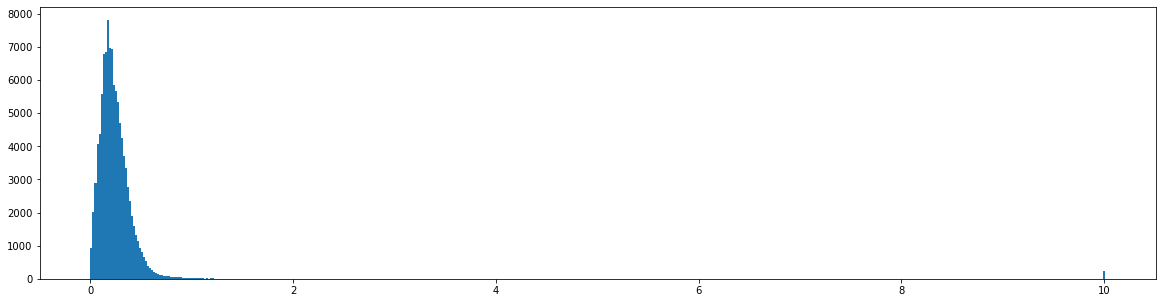

In [60]:
# replot
plt.figure(figsize = [20,5])
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', color = base_color, bins = 500);

The distribution is unimodal, and the curve on the right side looks more smooth than the left side. Let's also zoom in to the data with the debt to income ratio lower than 1.5.

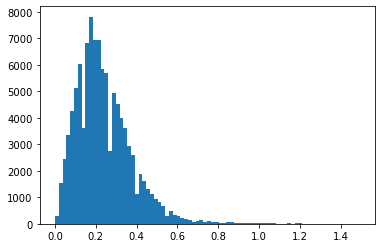

In [63]:
# plot the histgram forcused to the data whose debt to income ratio is lower than 1.5

plt.hist(data = df_loan[df_loan.DebtToIncomeRatio < 1.5], x = 'DebtToIncomeRatio', color = base_color, bins = 80);

It is slightly right skewed and the peak is around 0.2.

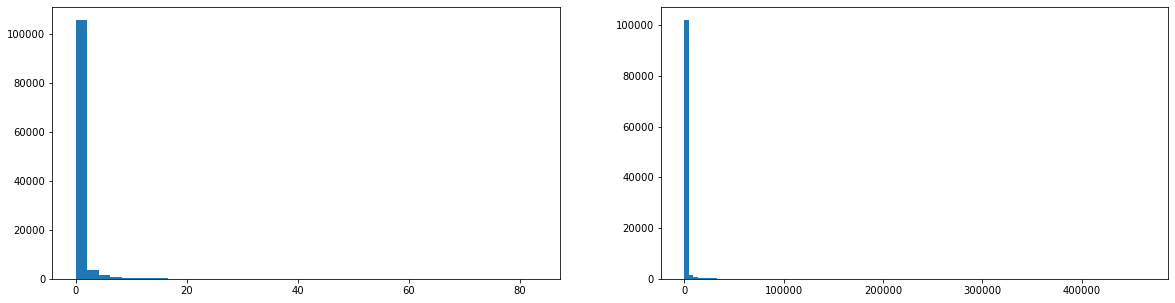

In [64]:
# Now let's check the Delinquencies
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
plt.hist(data = df_loan, x = 'CurrentDelinquencies', bins = 40);

plt.subplot(1,2,2)
plt.hist(data = df_loan, x = 'AmountDelinquent', bins = 100 );

In [65]:
print(df_loan.CurrentDelinquencies.describe())
print(df_loan.AmountDelinquent.describe())

count    113240.000000
mean          0.592052
std           1.978707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          83.000000
Name: CurrentDelinquencies, dtype: float64
count    106315.000000
mean        984.507059
std        7158.270157
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64


Most of the borrowers have no current delinquency as 70th percentile is still 0. To understand better, let's transform the scale of the Delinquencies amount into a log-scale, as it shows the long-tail distribution.

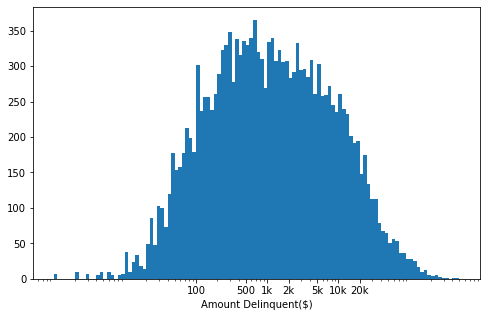

In [66]:
# Now let's transform the scale of the delinquencies amount into a log-scale.
plt.figure(figsize=[8, 5])
log_binsize = 0.05
bins_adeli = 10 ** np.arange(0, np.log10(df_loan['AmountDelinquent'].max())+log_binsize, log_binsize)
plt.hist(data = df_loan, x = 'AmountDelinquent', bins = bins_adeli);
plt.xscale('log')
plt.xticks([100,500, 1e3, 2e3, 5e3, 1e4, 2e4], [100,500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Amount Delinquent($)')
plt.show()


Amount of delinquent has a long-tailed distribution. Most of the borrower has 0 or low amount of delinquent and only few have a high amount of delinquent. When plotted on a log-scale, the amount of delinquent looks unimodal.

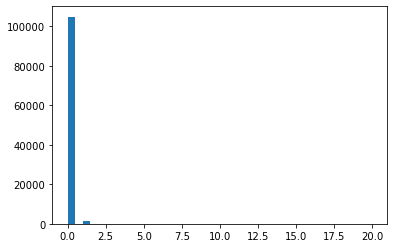

In [67]:
# Now let's check public record.

plt.hist(data = df_loan, x = 'PublicRecordsLast12Months', bins = 40);

In [68]:
df_loan.PublicRecordsLast12Months.value_counts()

0.0     104941
1.0       1255
2.0         96
3.0         28
4.0         10
7.0          2
20.0         1
Name: PublicRecordsLast12Months, dtype: int64

Most of the borrower have no public records.

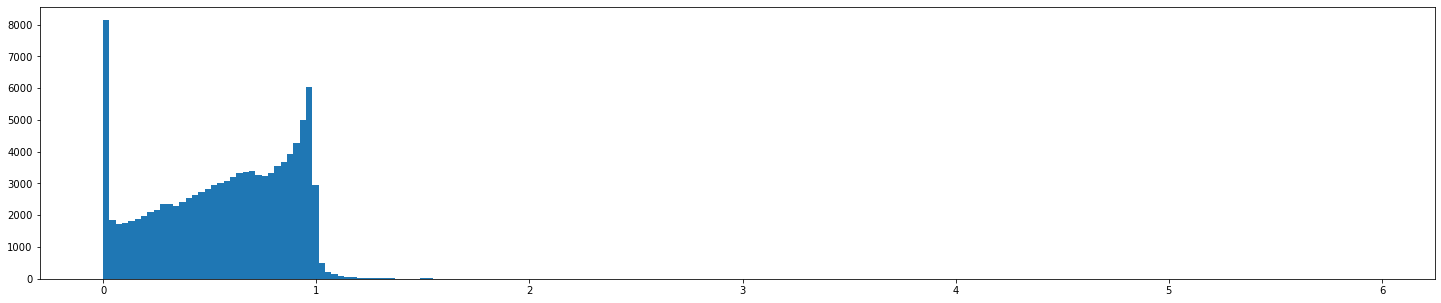

In [69]:
# Let's look at the bank card utilization 
plt.figure(figsize = [25,5])
plt.hist(data = df_loan, x = 'BankcardUtilization', bins = 200);

Interestingly, this feature can be over 1. While 0 has the highest frequency, the rest has a slight upwards trends towards 1. And this graph shows there is strong outlier on the right side.

In [70]:
df_loan[df_loan['BankcardUtilization']>2]

,BorrowerAPR,ProsperRating (numeric),CreditScoreRangeLower,IncomeRange,StatedMonthlyIncome,DebtToIncomeRatio,CurrentDelinquencies,AmountDelinquent,PublicRecordsLast12Months,BankcardUtilization,EmploymentStatus,IsBorrowerHomeowner,LoanStatus,LoanOriginalAmount,ListingCategory (numeric)
5031,0.34398,NaN,520.0,"$25,000-49,999",3033.333333,0.13,0.0,0.0,0.0,4.73,Employed,False,Defaulted,1500,4
26151,0.12700,NaN,680.0,"$25,000-49,999",3333.333333,0.10,0.0,0.0,0.0,5.95,Self-employed,True,Completed,5000,0
32777,0.22439,NaN,560.0,"$25,000-49,999",2248.750000,0.15,0.0,0.0,0.0,2.66,Self-employed,False,Completed,3100,0
32845,0.23880,NaN,560.0,"$50,000-74,999",4300.416667,0.18,4.0,6730.0,0.0,2.36,Employed,True,Defaulted,1000,0
37107,0.39261,NaN,560.0,"$25,000-49,999",2750.000000,0.16,1.0,1071.0,0.0,2.35,Employed,True,Completed,1200,1
53951,0.23981,NaN,540.0,"$75,000-99,999",6250.000000,0.14,5.0,7240.0,0.0,2.05,Employed,False,Completed,1000,0
67184,0.30349,NaN,560.0,"$25,000-49,999",2129.916667,0.26,1.0,114.0,1.0,3.47,Employed,False,Completed,1600,1
70752,0.29595,NaN,540.0,"$50,000-74,999",4916.666667,0.34,8.0,29403.0,1.0,2.68,Employed,False,Chargedoff,4000,0
71777,0.41355,NaN,560.0,"$25,000-49,999",3250.000000,0.14,0.0,0.0,0.0,5.83,Employed,False,Completed,1000,1
75144,0.19986,NaN,580.0,"$25,000-49,999",2253.333333,0.28,5.0,1236.0,0.0,2.46,Employed,True,Completed,1000,0


Let's plot this in log-scale as it has a long-tail.

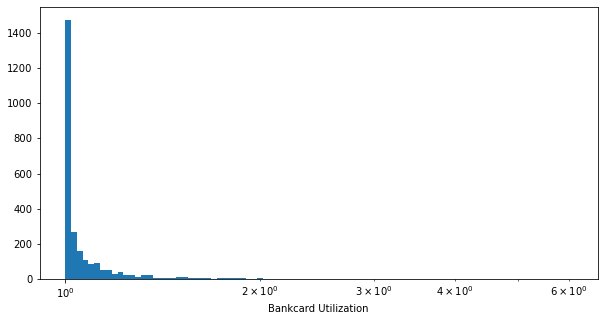

In [85]:
# Let's plot this in log-scale, as it has a long tail.
log_binsize = 0.009
bins = 10 ** np.arange(0, np.log10(df_loan['BankcardUtilization'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loan, x = 'BankcardUtilization', bins = bins)
plt.xscale('log')
plt.xlabel('Bankcard Utilization')
plt.show()

In the log scale, it looks truncated unimodal distribution. 

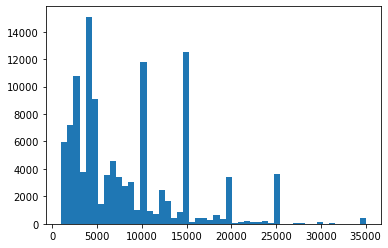

In [343]:
# now lets look at the original loan amount

plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = 50);

This shows multiple peak, and loan amount tends to be around nice round number.

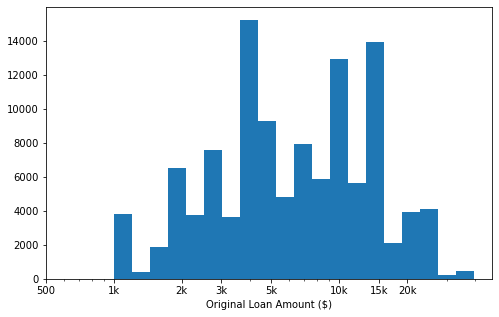

In [88]:
# There is a long tail in the distribution, so let's put it on a log scale instead.
log_binsize = 0.08
bins = 10**np.arange(3, np.log10(df_loan.LoanOriginalAmount.max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 3e3, 5e3, 1e4, 1.5e4, 2e4], [500, '1k', '2k','3k', '5k', '10k', '15k','20k'])
plt.xlabel('Original Loan Amount ($)')
plt.show()


In [139]:
df_loan.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

This looks multimodal with one peak around 4k and second peak around 15k. However, the curve is not smooth.

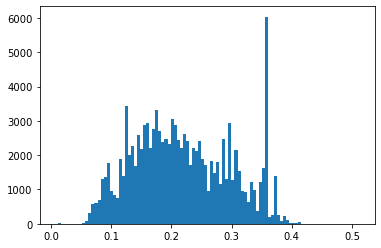

In [345]:
# Now let's have a look at the Borrower's rate
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = 100);

Interestingly, there is the highest peak at around 0.36. It shows roughly 3 peaks; around 0.18, 0.3 and 0.36. According to the [Prosper website](https://www.prosper.com/loans/rates-and-fees/?refac=CANMB&refmc=6YRANV&refd=prosperblog), APR is usually between 5.99% and 35.97%. This indicates that there are many borrowers with around the maximum APR.

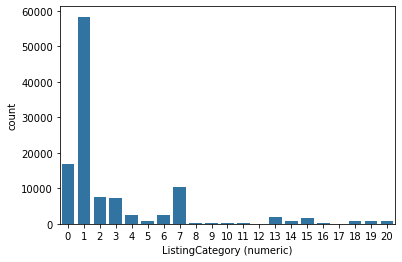

In [346]:
# now let's look at the listing category,
sb.countplot(data = df_loan, x = 'ListingCategory (numeric)', color = base_color);

In [347]:
df_loan['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

The most frequent category is Debt consolidation by far. After NA and Other, Home improvement and Business are frequent.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I looked at stated monthly income, amount of delinquent, bank card utilization and loan original amount using a log transform as they took on a large range of values and have long tail.<br>
Under the transformation, stated monthly income and amount of delinquent showed roughly unimodal distribution with one peak around 4k and 700 respectively.
Bankcard utilization showed truncated unimodal distribution with a peak at around 0. 
Loan original amount showed roughly looked bimodal with the peaks at around 4k and 15k, although the curve is not smooth.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Credit Score Range (Lower) contained the value of “0”. Given the nature of the score, I treated it as N/A. <br>
For employment status, I included “Full-time” and “Part-time” in the category "Employed" category, and treated “Not Available” as N/A.<br>
For income range: I included “Not employed” in \\$0 and treated “Not displayed” as N/A.<br>
Debt to income ratio has outlier with a monthly income less than \$1. I changed this outlier’s debt to income ratio into N/A and also replaced the debt to income ration of ”0” with N/A, considering the nature of the feature.<br>


## Bivariate Exploration

First off, I'd like to look at the pairwise correlations in the data.

In [89]:
# sort value of interest
numeric_vars = ['BorrowerAPR','CreditScoreRangeLower', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'CurrentDelinquencies', 'AmountDelinquent', 'PublicRecordsLast12Months', 
                'BankcardUtilization','LoanOriginalAmount']
categoric_vars = ['ProsperRating (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'ListingCategory (numeric)']

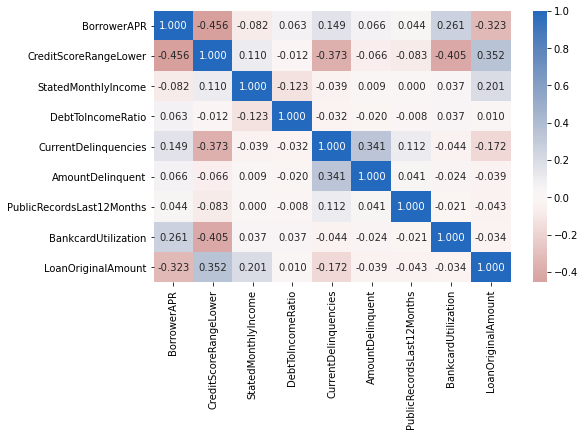

In [90]:
plt.figure(figsize = [8,5])
sb.heatmap(df_loan[numeric_vars].corr(), annot= True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

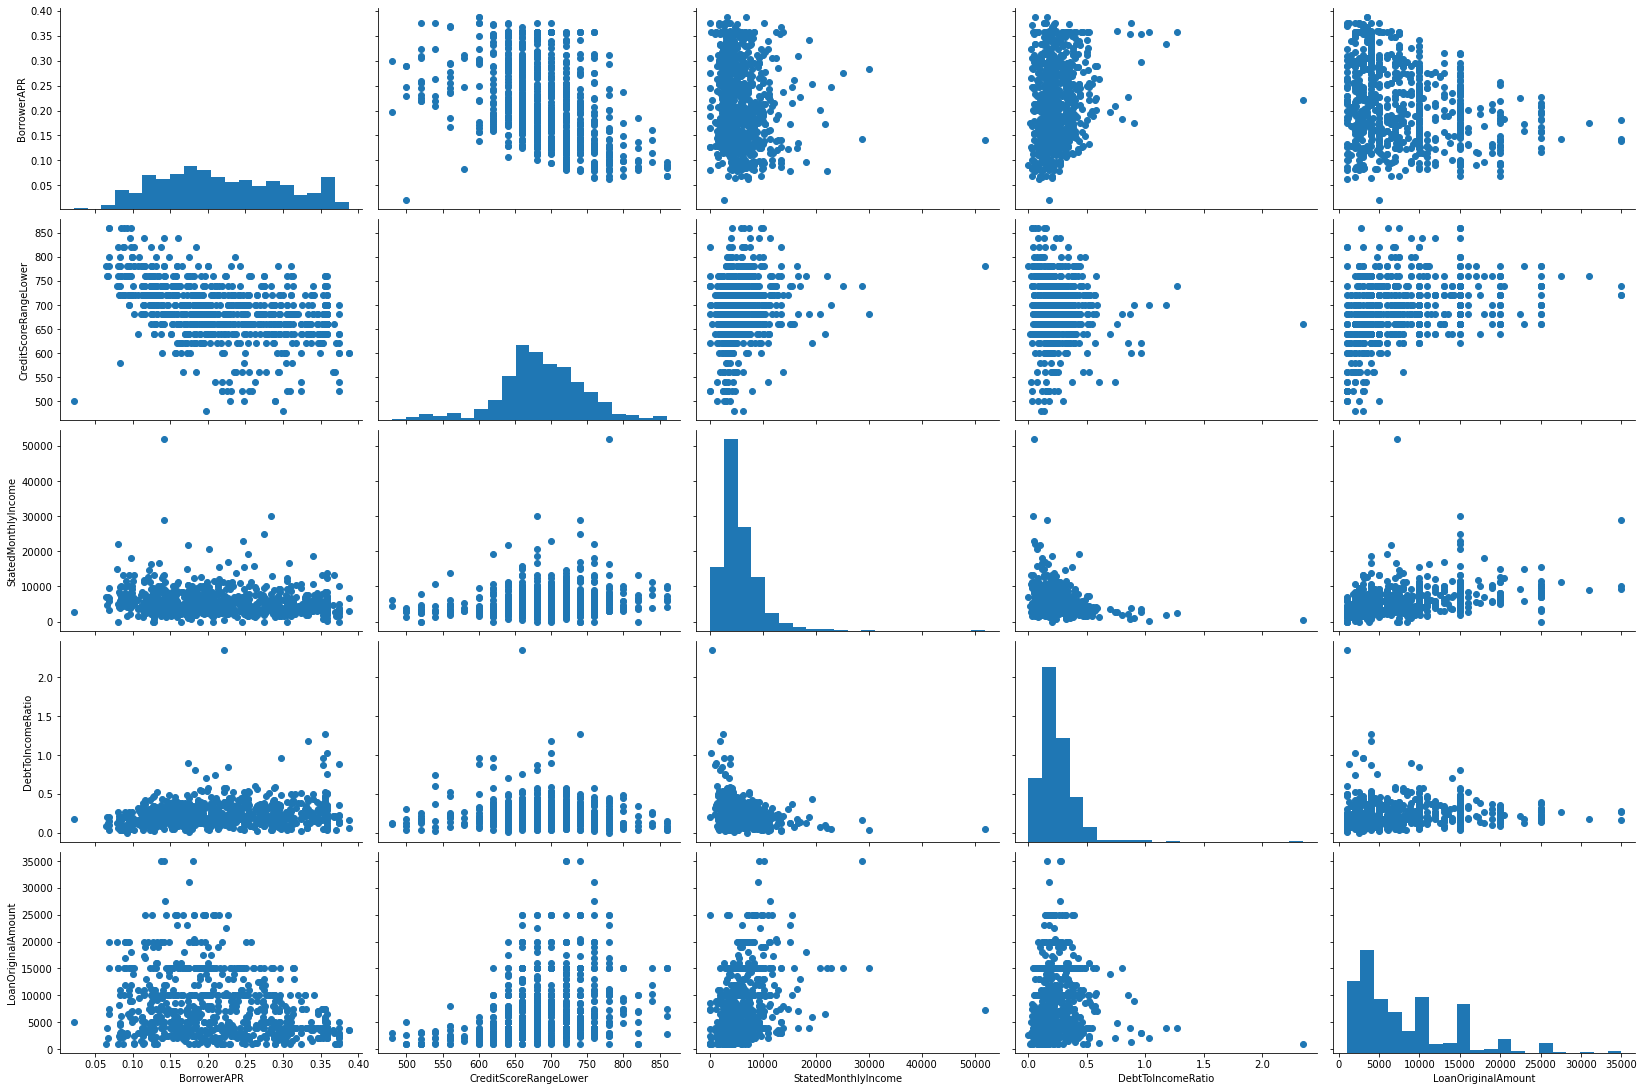

In [91]:
# plot matrix of features with the combination of my interest : sample 800 loans so that plots are clearer and they render faster
df_loan_samp500 = df_loan.sample(800)

g = sb.PairGrid(data = df_loan_samp500, vars = ['BorrowerAPR','CreditScoreRangeLower', 'StatedMonthlyIncome', 'DebtToIncomeRatio',  
                'LoanOriginalAmount'], height = 3, aspect = 1.5)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

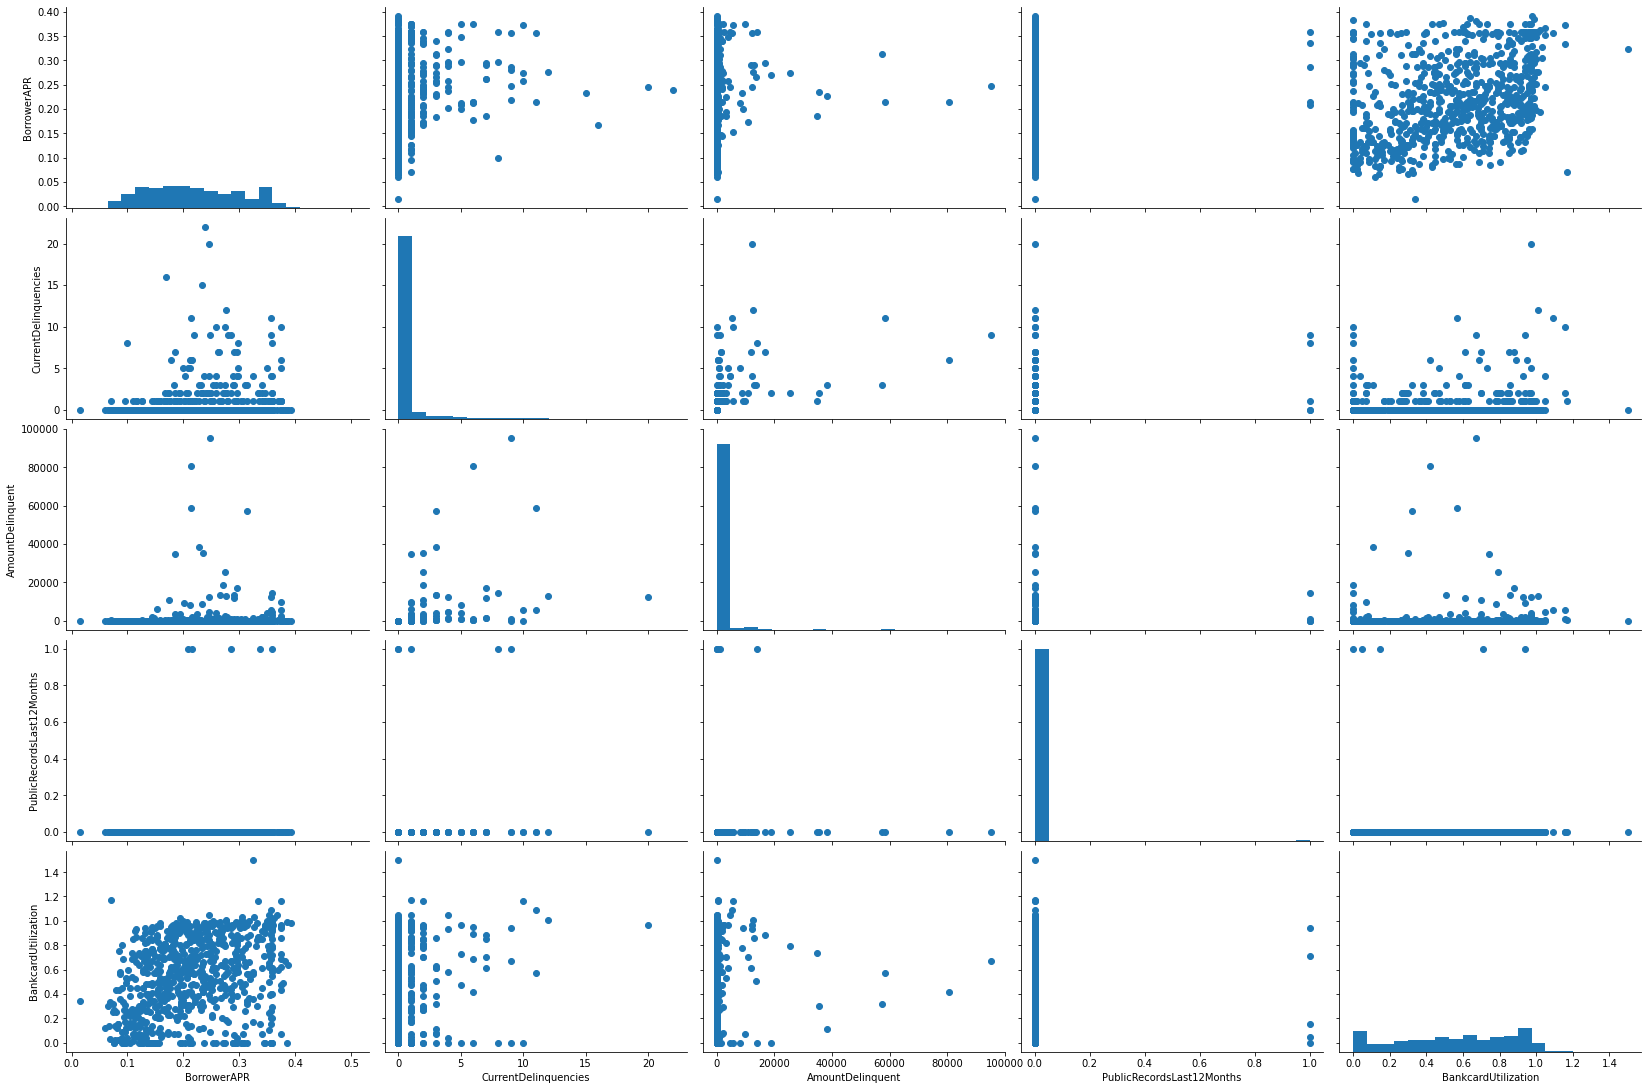

In [92]:
# plot matrix of features with the combination of my interest : sample 500 loans so that plots are clearer and they render faster
df_loan_samp500 = df_loan.sample(800)

g = sb.PairGrid(data = df_loan_samp500, vars = ['BorrowerAPR','CurrentDelinquencies', 'AmountDelinquent', 'PublicRecordsLast12Months',  
                'BankcardUtilization'], height = 3, aspect = 1.5)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As expected, borrower APR has a strong negative relationship with credits score range.
APR has also a negative relationship with original loan amount, and positive relationship with bank card utilization, although the graph of APR vs Bankcard utilization shows it is spreading widely into roughly rectangle shape between 0.05 and 0.36.
APR also shows a weak positive relationship with the number of current delinquencies.

Credit score range shows a positive relationship with original loan amount and a negative relationship with the number of current delinquencies and bank card utilization. 
Also, current delinquencies and bank card utilization have a positive relationship.
Stated monthly income also showed a positive relationship original loan amount. 

Surprisingly, debt to income ratio doesn't interact with other features that much.


Let's move on to looking at how Borrower APR and a few numeric features of interest correlate with the categorical variables.

<Figure size 2160x1800 with 0 Axes>

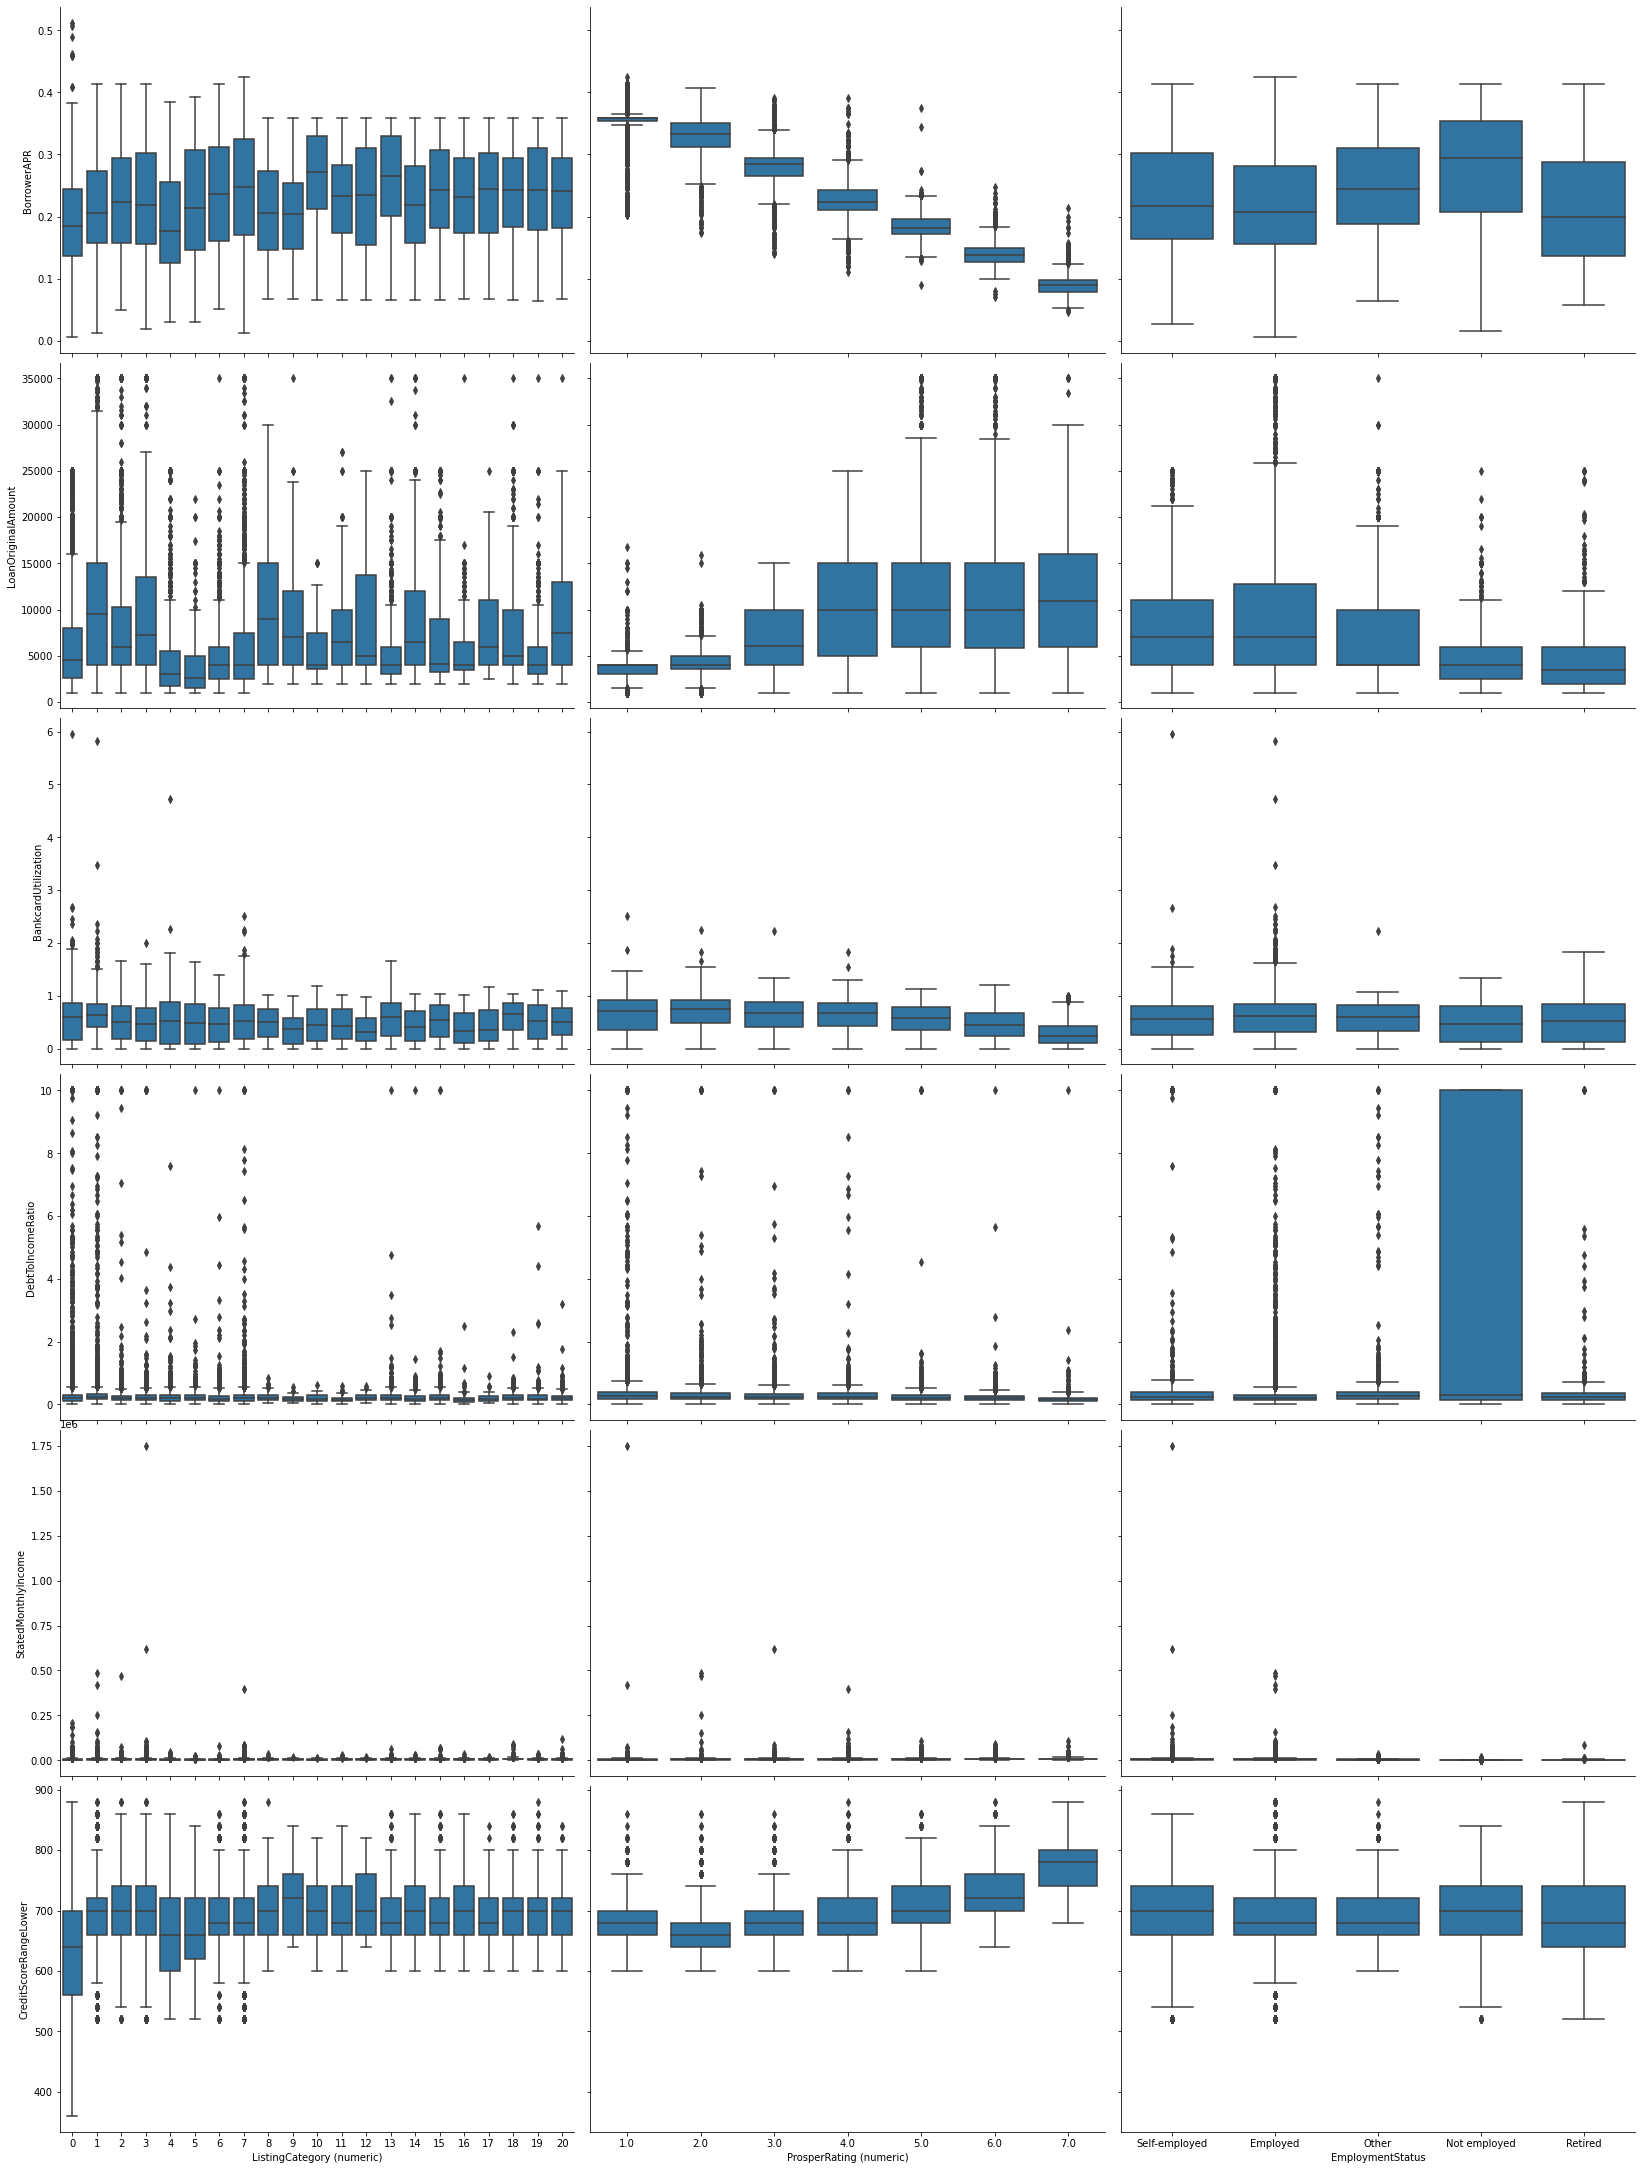

In [93]:
# Plot of matrix of numeric features against categorical features.
# As there are many categorical features, I will separate plots.

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [30, 25])


g = sb.PairGrid(data = df_loan, y_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'BankcardUtilization', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'CreditScoreRangeLower'],
                x_vars = ['ListingCategory (numeric)', 'ProsperRating (numeric)', 'EmploymentStatus'],
                height = 5, aspect = 1.5)

g.map(boxgrid)
plt.show();

Firstly, let's look at the listing category. Category 1(Debt Consolidation) and 8(Baby&Adoption) have higher Q2 and Q3 of the loan amount compared to others. Also, 10(Cosmetic Procedure) and 13(Household Expenses) have a slightly higher APR. And min. and max. of 8-20 are all surprisingly matching and category 0-7 has spread wider than 8-20. This suggests there might be APR criteria based on the listing category.
Also, category 0-7's debt to income ratio have a lot of higher outliers compared to others.

Secondly, in terms of Prosper rating, the lower rate tends to have more higher-outliers in debt to income ratio. And, Prosper rating shows a positive relationship with loan original amount, although the rating of 5-7 doesn't show a significant difference. On the other hand, it shows a clear negative relationship with APR.

Thirdly, not employed people have high debt to income ratio, which is imaginable. And, employed people have a higher amount of original loan compared to the others. In terms of the loan amount, employed people have the highest Q4, but the median is around the same with self-employed people. In terms of APR, employed and retired people has interestingly lower 1Q and 2Q than the others. Also, not-employed status has a slightly higher median of APR compared to the others.

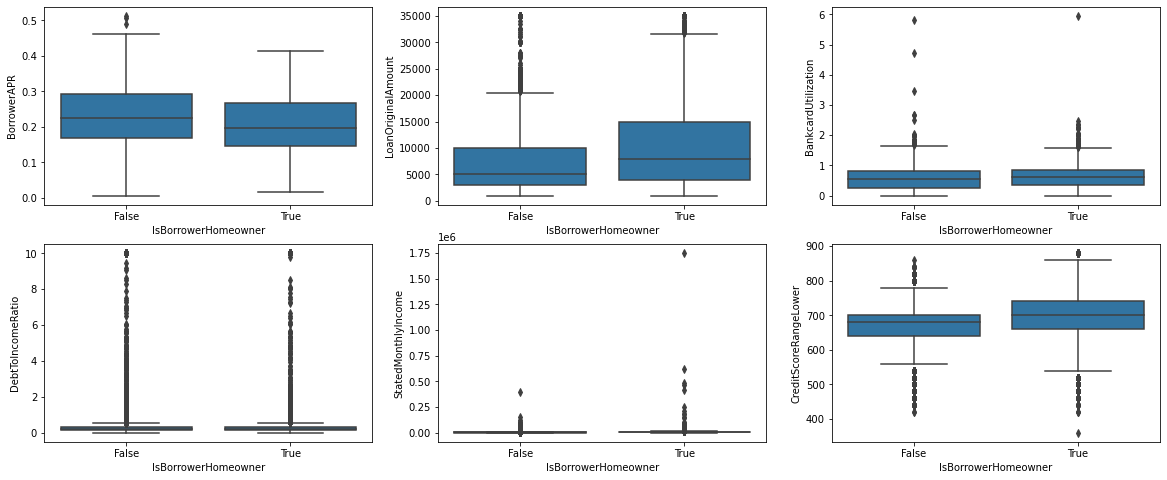

In [94]:
# plot 2  Homeower vs numeric feature
y_list = ['BorrowerAPR', 'LoanOriginalAmount', 'BankcardUtilization', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'CreditScoreRangeLower']

plt.figure(figsize = [20, 8])
for i in range(6):
    plt.subplot(2,3,i+1)
    sb.boxplot(data = df_loan, x = 'IsBorrowerHomeowner', y = y_list[i], color = sb.color_palette()[0])

plt.show();

In terms of APR, borrowers who don't own home have slightly higher APR, while min. APR is lower than people who own home. Borrowers who own home has higher original loan amount and also slightly higher credit score range.

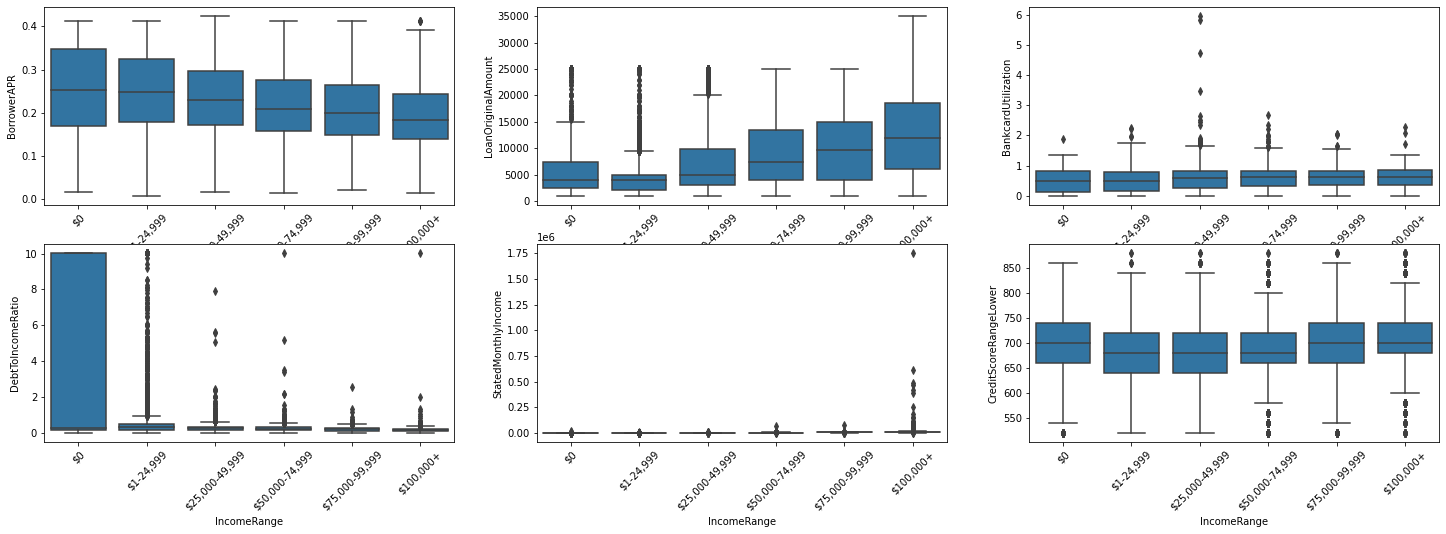

In [95]:
# plot  3: Income range vs numeric features
y_list = ['BorrowerAPR', 'LoanOriginalAmount', 'BankcardUtilization', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'CreditScoreRangeLower']

plt.figure(figsize = [25, 8])
for i in range(6):
    plt.subplot(2,3,i+1)
    sb.boxplot(data = df_loan, x = 'IncomeRange', y = y_list[i], color = sb.color_palette()[0], order = order_inc)
    plt.xticks(rotation = 45)

plt.show();

Borrower APR shows a negative relationship with Income range. On the other hand, the original loan amount shows a positive relationship with Income range, while \\$0 income has slightly higher original amount than the income range of \\$1-24,999. Bankcard utilization and debt to income ration (except income range of \\$0) don't interact much. Surprisingly, credit score rating doesn't show a linear relationship with income range, although the people with \\$100,000+ income's Q1 is higher than the others.


Finally, let's look at relationships between the categorical features.

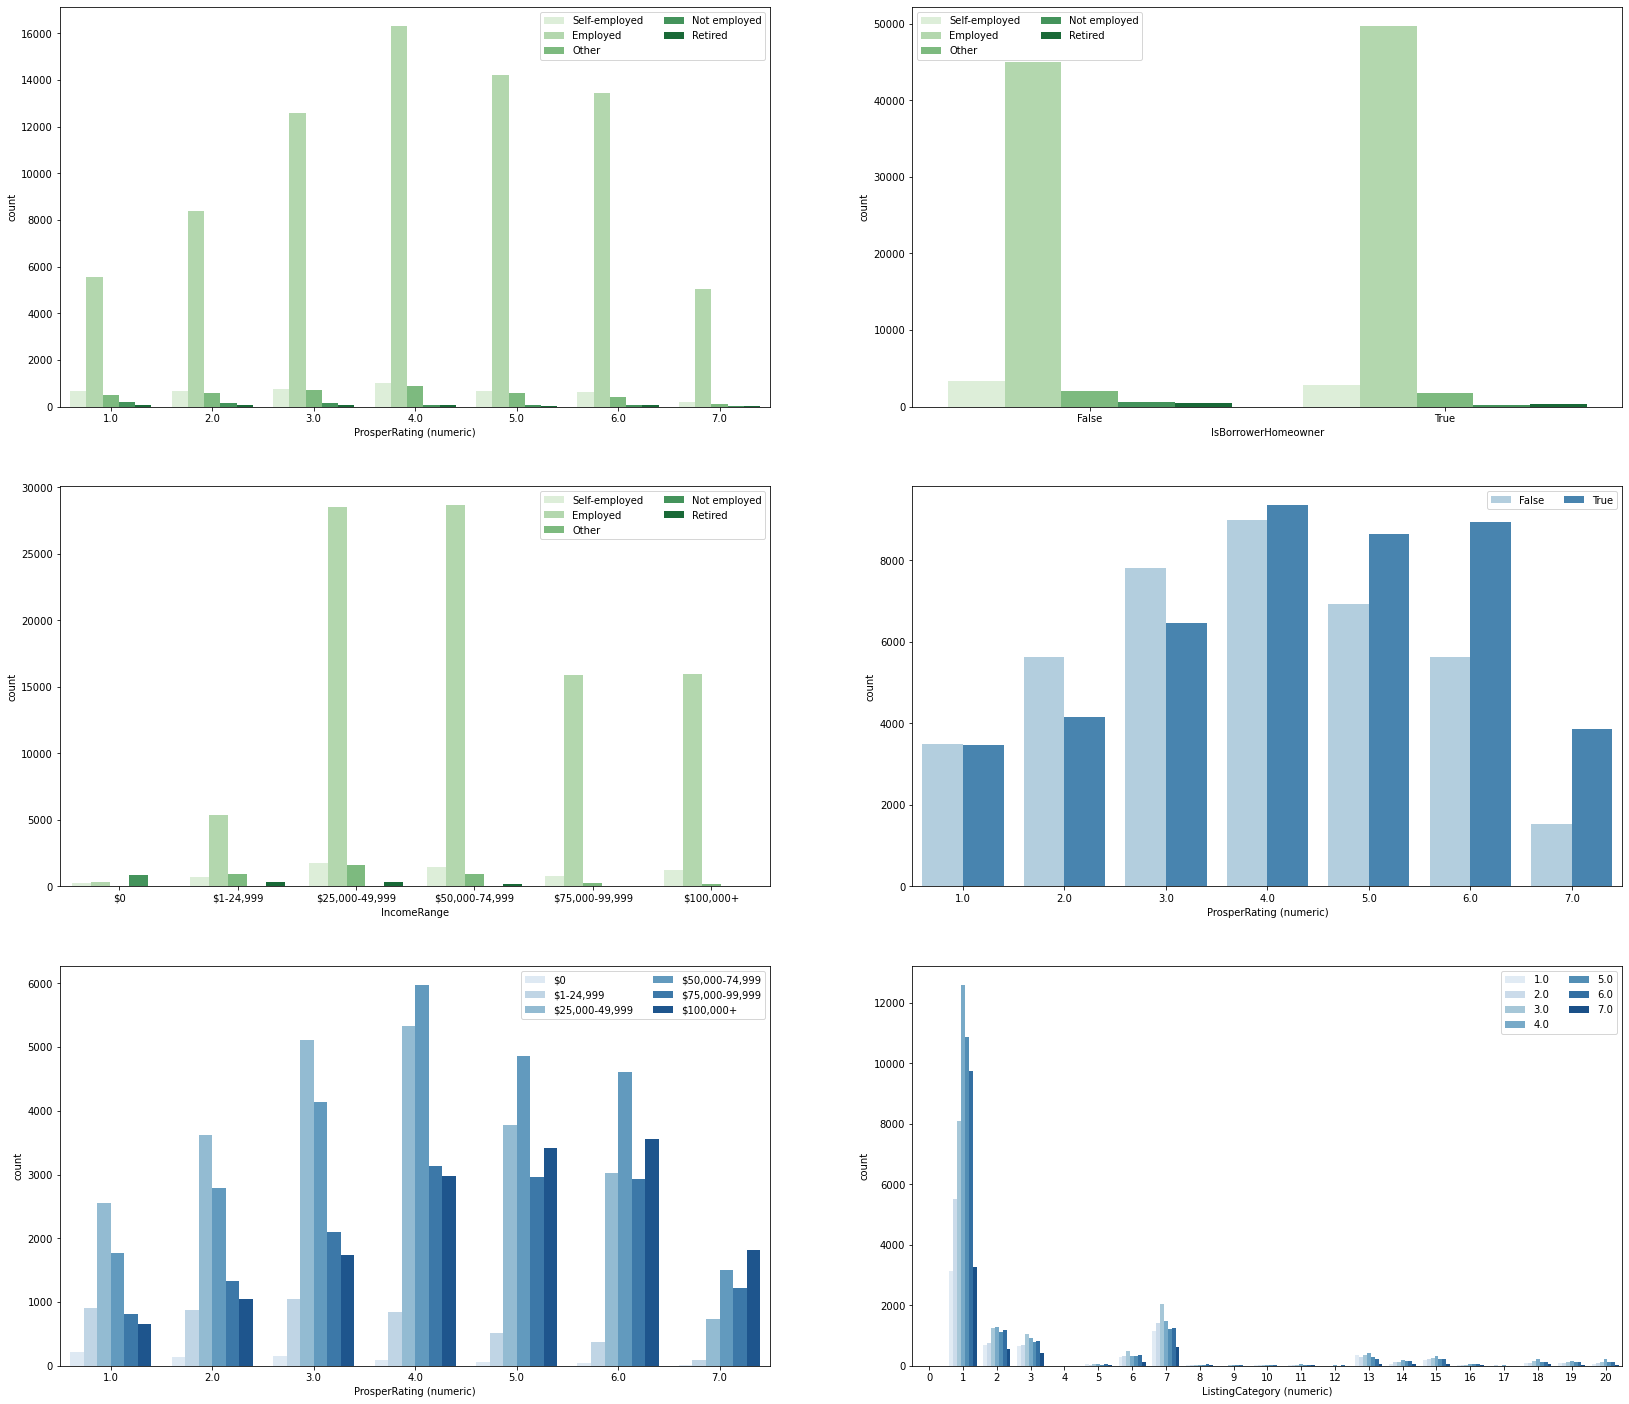

In [99]:
#I selected a few combination based on my interest.

plt.figure (figsize = [28,25])


#subplot 1 :EmploymentStatus vs ProsperRating (numeric)
ax = plt.subplot(3, 2, 1)
sb.countplot(data = df_loan, x = 'ProsperRating (numeric)', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(ncol = 2)

#subplot 2:EmploymentStatus vs  IsBorrowerHomeowner
ax = plt.subplot(3, 2, 2)
sb.countplot(data = df_loan, x = 'IsBorrowerHomeowner', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(ncol = 2)

#subplot 3 :EmploymentStatus vs  IncomeRange
ax = plt.subplot(3, 2, 3)
sb.countplot(data = df_loan, x = 'IncomeRange', hue = 'EmploymentStatus', palette = 'Greens', order = order_inc)
ax.legend(ncol = 2)

#subplot 4 :ProsperRating (numeric) vs  IsBorrowerHomeowner
ax = plt.subplot(3, 2, 4)
sb.countplot(data = df_loan, x = 'ProsperRating (numeric)', hue = 'IsBorrowerHomeowner', palette = 'Blues')
ax.legend(ncol = 2)

#subplot 5 :ProsperRating (numeric) vs  IncomeRange
ax = plt.subplot(3, 2, 5)
sb.countplot(data = df_loan, x = 'ProsperRating (numeric)', hue = 'IncomeRange', palette = 'Blues', hue_order = order_inc)
ax.legend(ncol = 2)

#subplot 6 :ProsperRating (numeric) vs ListingCategory (numeric) 
ax = plt.subplot(3, 2, 6)
sb.countplot(data = df_loan, x = 'ListingCategory (numeric)', hue = 'ProsperRating (numeric)', palette = 'Blues')
ax.legend(ncol = 2);


In terms of Prosper rating and employment status, there are less not-employed people in Prosper rating of 6 and 7. There is not much interaction between homeownership and employment status. In terms of income range vs employment status, the proportion of self-employed is higher in the income range of \\$75,000 +. And, people with no income are mostly not-employed people.

Prosper rating vs homeownership shows strong interaction. Higher ratings than 3 has more people owning homes. Also, Prosper rating vs income range has strong interaction. While, there are people with low ratings with high income, higher ratings than 3 has more people with the income range of \\$50,000+.

Listing category and rating has little interaction.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

As expected, borrower APR has a strong negative relationship with credits score range and Prosper ratings. APR has also a negative relationship with the original loan amount. APR also shows a weak positive relationship with the number of current delinquencies.

In terms of listing category, 10(Cosmetic Procedure) and 13(Household Expenses) have slightly higher APR. And Q1 and Q4 of APR of category 8-20 are all surprisingly matching and category 0-7 has spread wider than 8-20. This suggests there might be APR criteria based on the listing category.

Employed and retired people have interestingly lower APR at 1Q and 2Q than the other employment status. Also, not-employed status has a slightly higher median of APR compared to the others.

Also, borrowers who don't own home have slightly higher APR, while min. APR is lower than people who own home. 
And, APR shows a negative relationship with income range. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Credit score range shows a positive relationship with original loan amount and a negative relationship with the number of current delinquencies and bank card utilization. Also, current delinquencies and bank card utilization have a positive relationship. Stated monthly income also showed a positive relationship original loan amount.

In terms of the listing category, category 1(Debt Consolidation) and 8(Baby&Adoption) have higher Q2 and Q3 of the loan amount compared to others. 

Also, Prosper rating shows a positive relationship with loan original amount and there are less not-employed people in Prosper rating of 6 and 7. 

Prosper rating vs homeownership shows strong interaction. Higher ratings than 3 has more people owning homes. Also, Prosper rating vs income range has strong interaction. While, there are people with low ratings with high income, higher ratings than 3 has more people with the income range of \\$50,000+. 

And, Employed people have a higher amount of original loan compared to the others. 
In terms of the loan amount, employed people have the highest 4Q, but the median is around the same with self-employed people. 

Original loan amount shows a positive relationship with Income range, while \\$0 income has slightly higher original amount than the income range of \\$1-24,999. 

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the original loan amount, prosper rating, bankcard Utilization, income and employment status interact with APR. 

In [101]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    plt.hist2d(x, y, bins = 40, cmap = palette, cmin = 0.5)


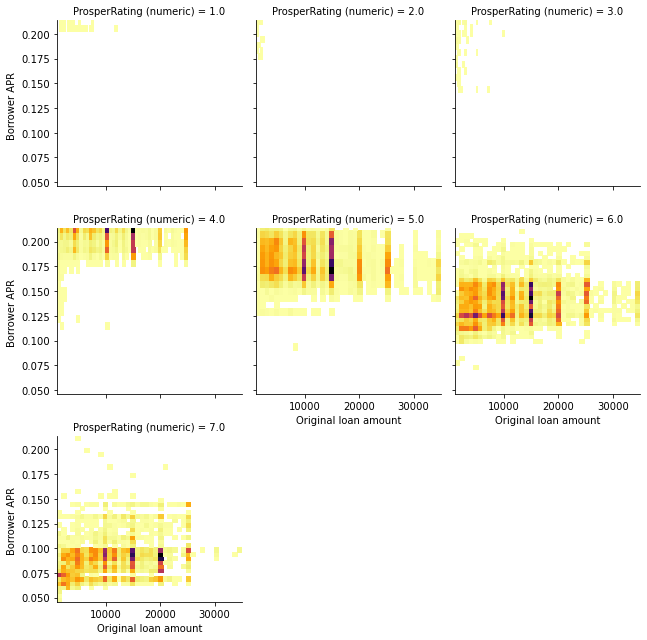

In [105]:
# create faceted heat maps on levels of income range and employment
# APR vs Prosper rating vs original loan
g = sb.FacetGrid(data = df_loan, col = 'ProsperRating (numeric)', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('Original loan amount')
g.set_ylabels('Borrower APR ')

plt.show()

As the Prosper rating increase, the cloud of points moves towards the bottom of the plot. Also, as the Prosper Rating increase, more higher-loan amount appears, although ratings of 5 and 6 seem the peak and rating 7 has less high loan amount while borrower APR still goes lower than 5 and 6.

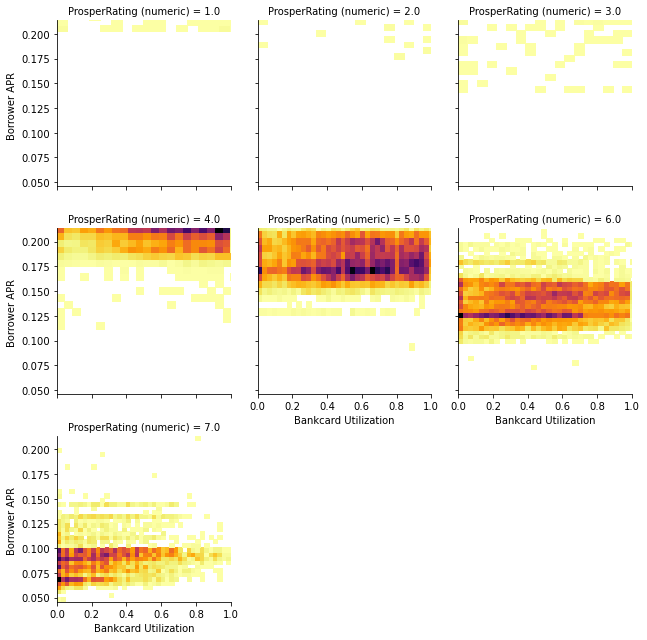

In [106]:
# APR vs Prosper rating vs bank card utilization
g = sb.FacetGrid(data = df_loan, col = 'ProsperRating (numeric)', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'BankcardUtilization', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('Bankcard Utilization')
g.set_ylabels('Borrower APR ')

plt.show()

As the Prosper rating increase, the cloud of points moves from right-top to left bottom. As Prosper ratings increase, more lower bankcard utilization appears.

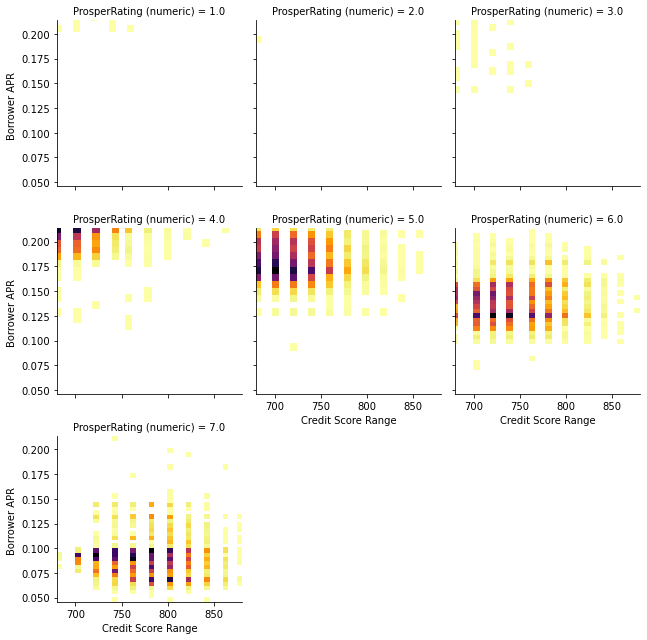

In [107]:
# APR vs Prosper rating vs Credit score range
g = sb.FacetGrid(data = df_loan, col = 'ProsperRating (numeric)', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'CreditScoreRangeLower', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('Credit Score Range')
g.set_ylabels('Borrower APR ')

plt.show()

As the Prosper rating increase, the cloud of points moves from left-top to middle bottom. As Prosper ratings increase, more higher credit score range appears.

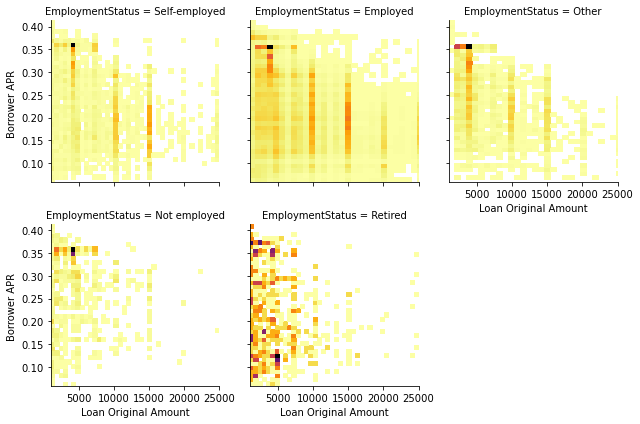

In [108]:
# APR vs Employment Status vs Loan Original Amount
g = sb.FacetGrid(data = df_loan, col = 'EmploymentStatus', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('Loan Original Amount')

g.set_ylabels('Borrower APR ')

plt.show()

Retired people seems to borrow a smaller amount of loan while APR is still widely spread. The cloud points don't move clearly and employment status doesn't give a significant impact on APR compared to the original loan amount.

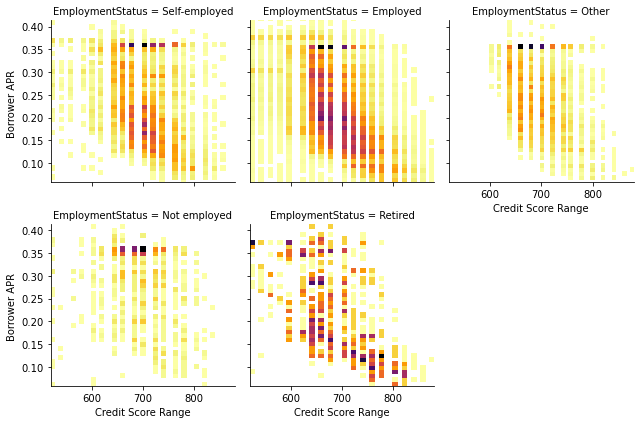

In [112]:
# APR vs Employment Status vs credit score range
g = sb.FacetGrid(data = df_loan, col = 'EmploymentStatus', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'CreditScoreRangeLower', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('Credit Score Range')
g.set_ylabels('Borrower APR ')

plt.show()

The cloud points of not-employed and others are high, while the cloud points of other employment status are more spread around the middle from the top to lower right.
Thus, employment status seem to have more impact than the credit score itself, especially if you are unemployed.

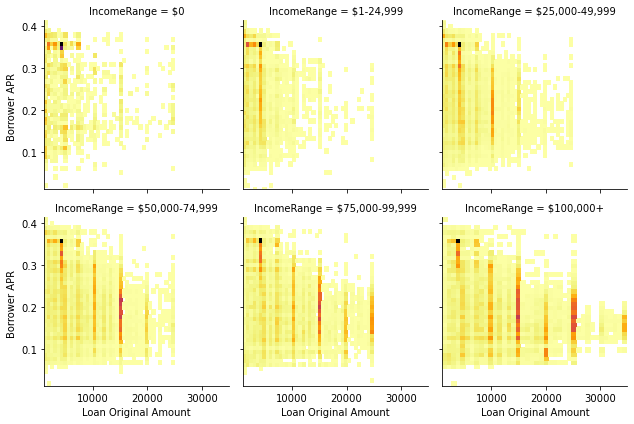

In [113]:
# APR vs Income Range vs Loan Original Amount
g = sb.FacetGrid(data = df_loan, col = 'IncomeRange', col_order = order_inc, col_wrap = 3, height = 3)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('Loan Original Amount')

g.set_ylabels('Borrower APR ')

plt.show()

As the income range increase, the higher loan amount increase. The cloud points appearing as the vertical line don't significantly change between income range, while it gets shorter when the loan amount gets higher. Thus, the income range doesn't give significant impact compared to the loan amount.

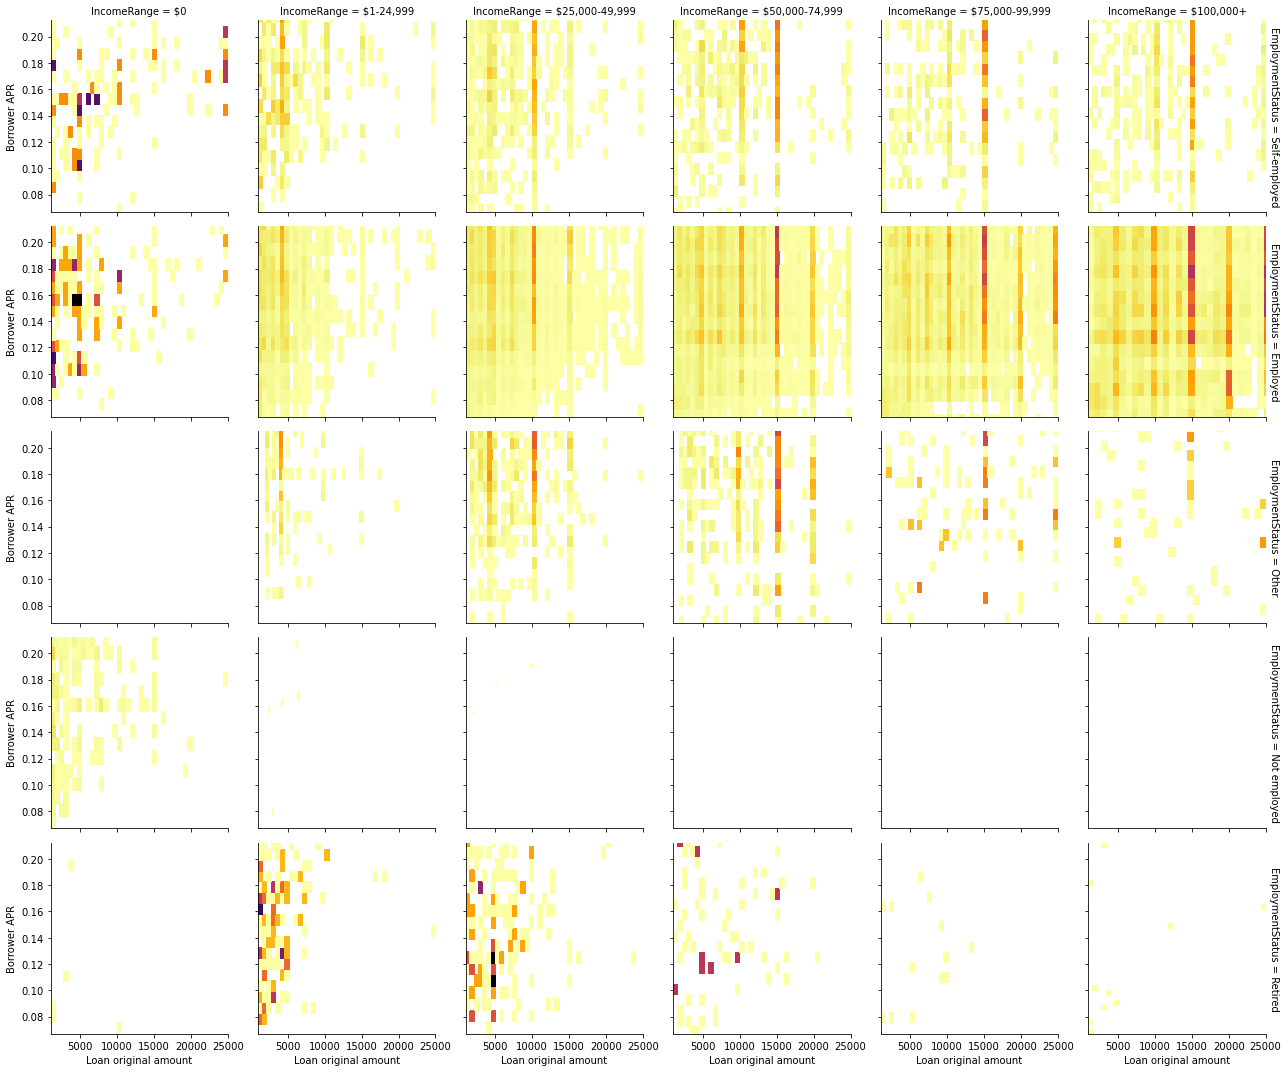

In [118]:
# APR vs Income Range vs Loan Original Amount vs Employment Status
g = sb.FacetGrid(data = df_loan, col = 'IncomeRange', col_order = order_inc, row = 'EmploymentStatus', height = 3, margin_titles = True)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('Loan original amount')
g.set_ylabels('Borrower APR')

plt.show()

Self-employed and employed group shows a similar movement along with the increase of income range. Just employed group has more higher loan amount even when both are in the same income range. The employed group also has more lower APR rate in every income range. There are retired people with high-income range, but APR doesn't show a significant difference between each income range.

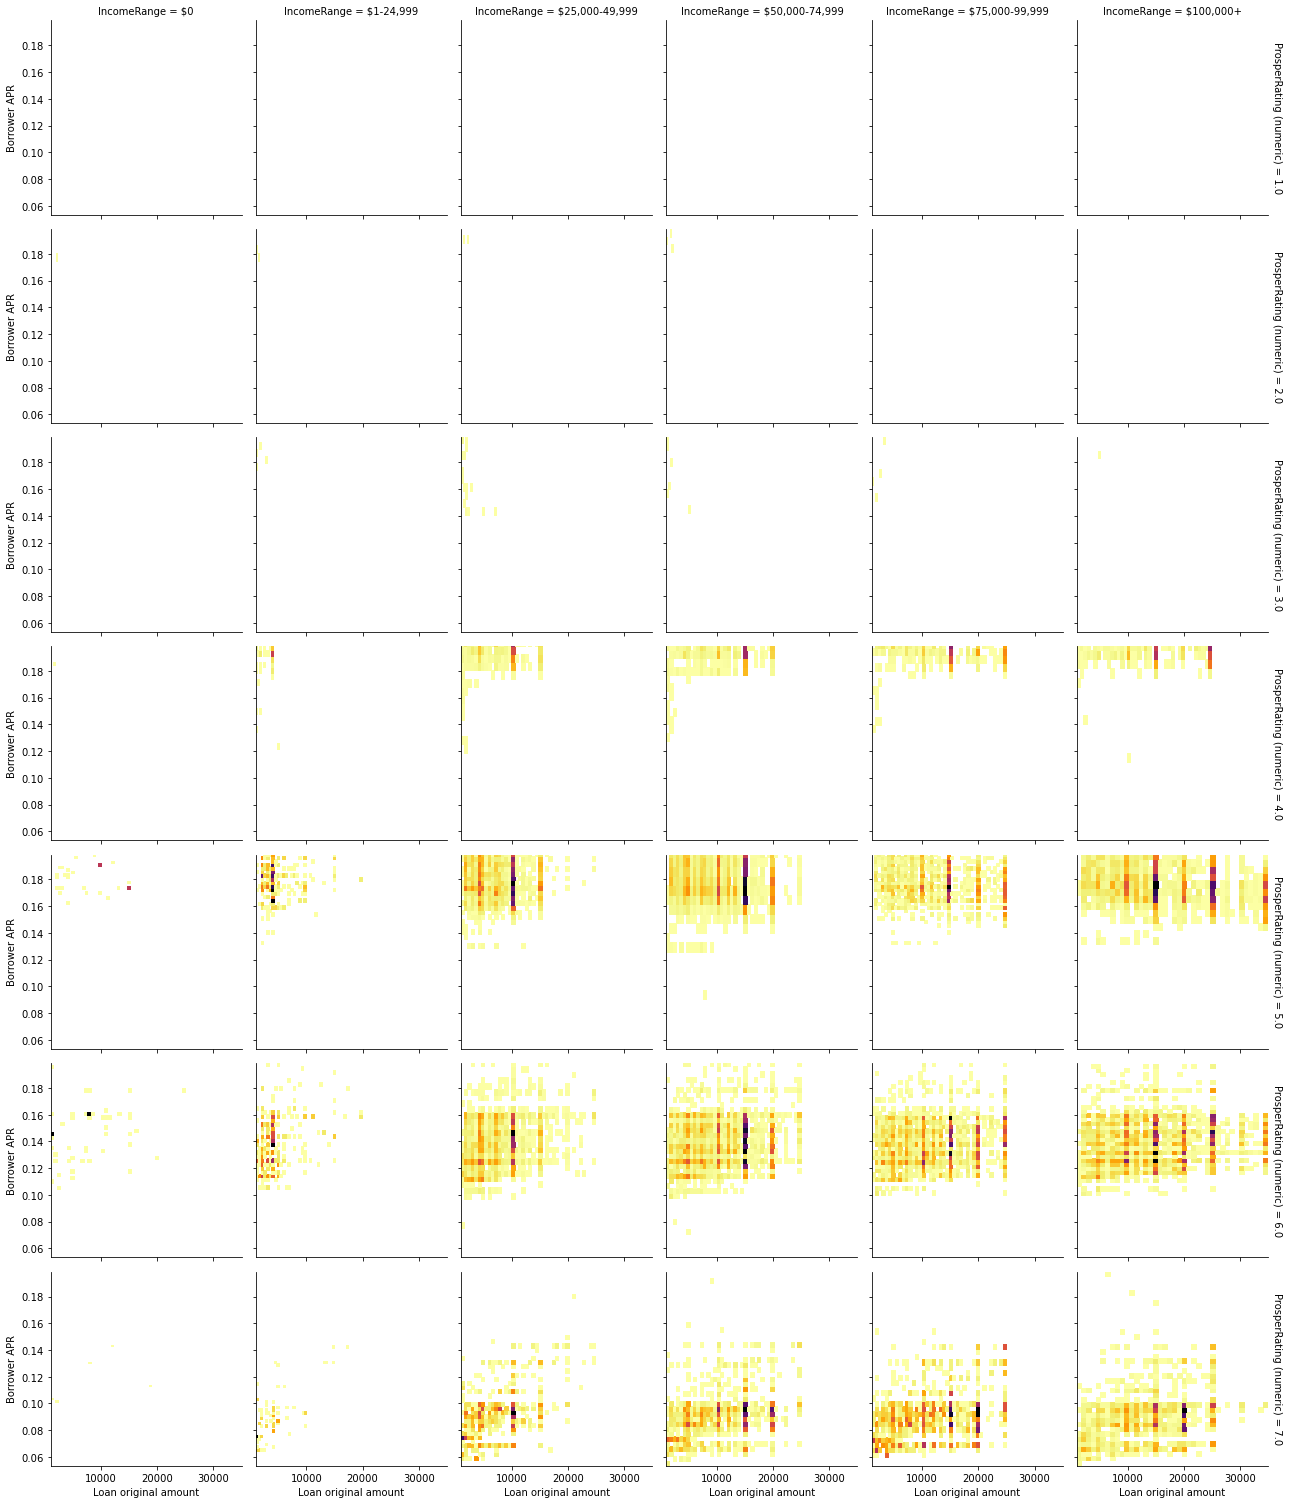

In [117]:
# APR vs Income Range vs Loan Original Amount vs Prosper rating
g = sb.FacetGrid(data = df_loan, col = 'IncomeRange', col_order = order_inc, row = 'ProsperRating (numeric)', height = 3, margin_titles = True)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('Loan original amount')
g.set_ylabels('Borrower APR')

plt.show()

Most of the lower have income and Prosper rating of more than 3.
The income doesn't influence much on APR, compared to the Prosper rating. As the Prosper rating goes higher, there are more lower APR.
The cloud points move from left to right as loan amount increase, and move from top to bottoms as the Prosper rating increases.

To have a better understanding, I will look at specific loan original amount.

In [115]:
df_loan.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [121]:
df_loan.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

In [122]:
df_loan_org1 = df_loan[df_loan['LoanOriginalAmount'] < 4000]
df_loan_org2 = df_loan[(4000<= df_loan['LoanOriginalAmount']) & (df_loan['LoanOriginalAmount'] <6500)]
df_loan_org3 = df_loan[(6500<= df_loan['LoanOriginalAmount']) & (df_loan['LoanOriginalAmount'] <12000)]
df_loan_org4 = df_loan[1200<= df_loan['LoanOriginalAmount']]

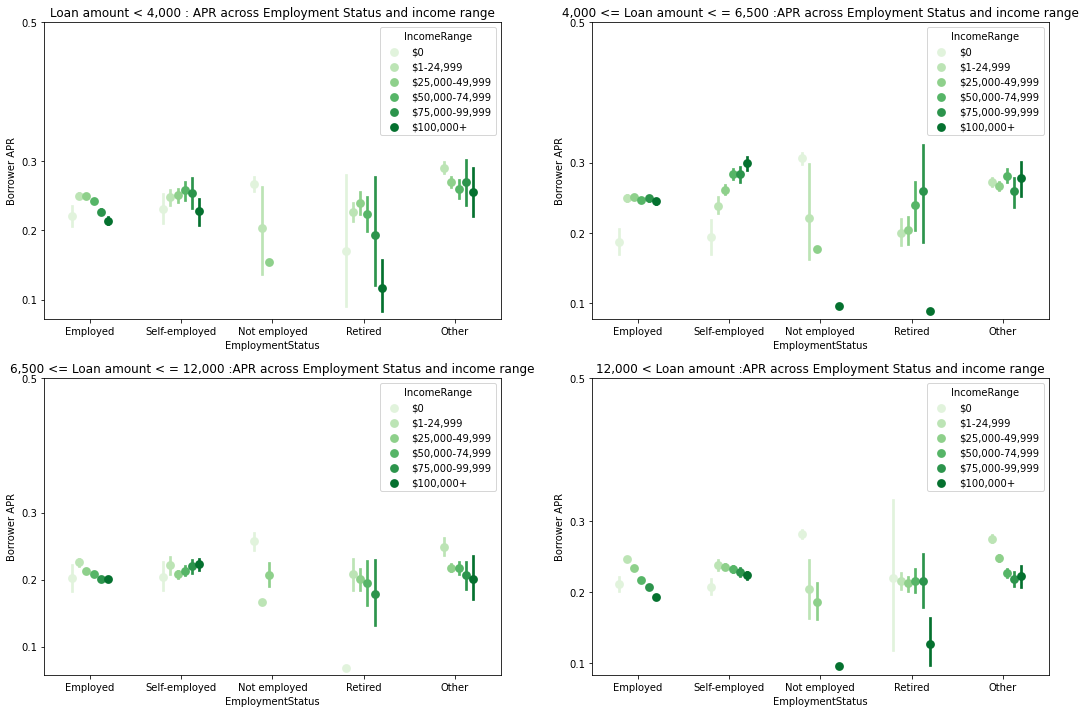

In [136]:
# APR vs Income Range vs Loan Original Amount vs Employment status
order_emp = ['Employed', 'Self-employed','Not employed', 'Retired', 'Other']

plt.figure(figsize = [18,12])

#1
plt.subplot(2,2,1)
ax = sb.pointplot(data = df_loan_org1, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'IncomeRange', hue_order = order_inc,
           palette = 'Greens', linestyles = '', dodge = 0.4, order = order_emp)
plt.title('Loan amount < 4,000 : APR across Employment Status and income range')
plt.ylabel('Borrower APR')

plt.yticks([0.1, 0.2, 0.3, 0.5], ['0.1', '0.2', '0.3', '0.5'])
ax.set_yticklabels([],minor = True)

#2
plt.subplot(2,2,2)
ax = sb.pointplot(data = df_loan_org2, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'IncomeRange', hue_order = order_inc,
           palette = 'Greens', linestyles = '', dodge = 0.4, order = order_emp)
plt.title('4,000 <= Loan amount < = 6,500 :APR across Employment Status and income range')
plt.ylabel('Borrower APR')

plt.yticks([0.1, 0.2, 0.3, 0.5], ['0.1', '0.2', '0.3', '0.5'])
ax.set_yticklabels([],minor = True)

#3
plt.subplot(2,2,3)
ax = sb.pointplot(data = df_loan_org3, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'IncomeRange', hue_order = order_inc,
           palette = 'Greens', linestyles = '', dodge = 0.4, order = order_emp)
plt.title('6,500 <= Loan amount < = 12,000 :APR across Employment Status and income range')
plt.ylabel('Borrower APR')

plt.yticks([0.1, 0.2, 0.3, 0.5], ['0.1', '0.2', '0.3', '0.5'])
ax.set_yticklabels([],minor = True)

#4
plt.subplot(2,2,4)
ax = sb.pointplot(data = df_loan_org4, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'IncomeRange', hue_order = order_inc,
           palette = 'Greens', linestyles = '', dodge = 0.4, order = order_emp)
plt.title('12,000 < Loan amount :APR across Employment Status and income range')
plt.ylabel('Borrower APR')

plt.yticks([0.1, 0.2, 0.3, 0.5], ['0.1', '0.2', '0.3', '0.5'])
ax.set_yticklabels([],minor = True)
plt.show();

When you are employed, the influence of income to APR are clear, although interestingly, income range of \\$0 has much lawer APR.
Other than employed group, the influence of employment status on APR is not clear.

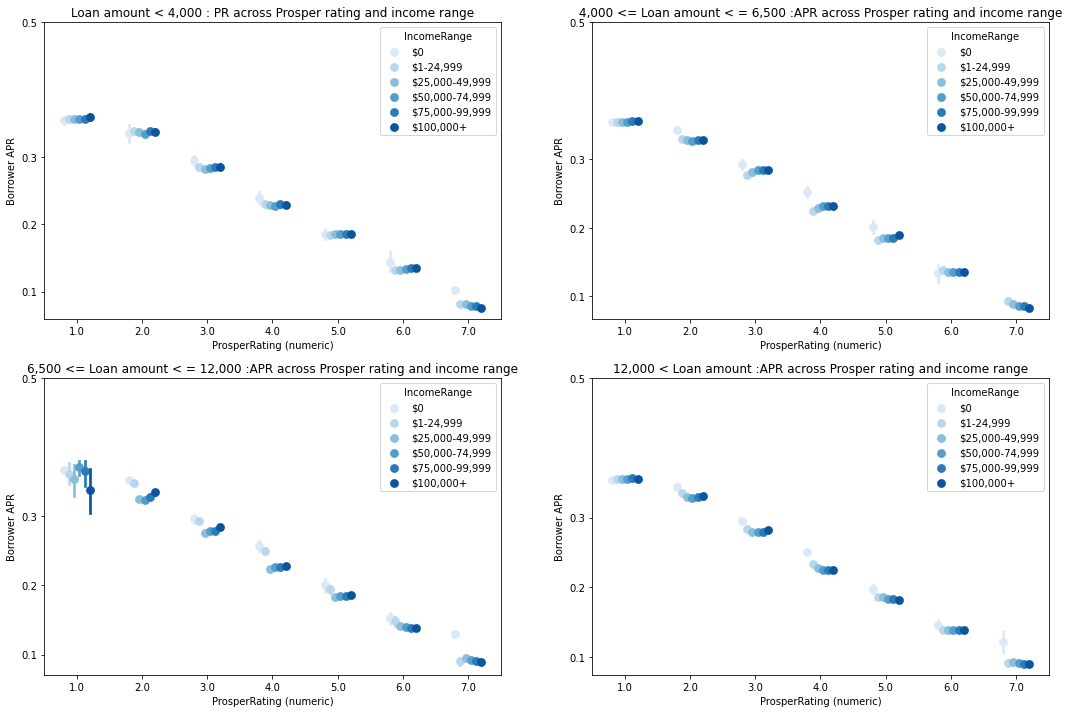

In [128]:
# APR vs Income Range vs Loan Original Amount vs Prosper rating
plt.figure(figsize = [18,12])

#1
plt.subplot(2,2,1)
ax = sb.pointplot(data = df_loan_org1, x = 'ProsperRating (numeric)', y = 'BorrowerAPR', hue = 'IncomeRange', hue_order = order_inc,
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan amount < 4,000 : PR across Prosper rating and income range')
plt.ylabel('Borrower APR')

plt.yticks([0.1, 0.2, 0.3, 0.5], ['0.1', '0.2', '0.3', '0.5'])
ax.set_yticklabels([],minor = True)

#2
plt.subplot(2,2,2)
ax = sb.pointplot(data = df_loan_org2, x = 'ProsperRating (numeric)', y = 'BorrowerAPR', hue = 'IncomeRange', hue_order = order_inc,
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('4,000 <= Loan amount < = 6,500 :APR across Prosper rating and income range')
plt.ylabel('Borrower APR')

plt.yticks([0.1, 0.2, 0.3, 0.5], ['0.1', '0.2', '0.3', '0.5'])
ax.set_yticklabels([],minor = True)

#3
plt.subplot(2,2,3)
ax = sb.pointplot(data = df_loan_org3, x = 'ProsperRating (numeric)', y = 'BorrowerAPR', hue = 'IncomeRange', hue_order = order_inc,
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('6,500 <= Loan amount < = 12,000 :APR across Prosper rating and income range')
plt.ylabel('Borrower APR')

plt.yticks([0.1, 0.2, 0.3, 0.5], ['0.1', '0.2', '0.3', '0.5'])
ax.set_yticklabels([],minor = True)

#4
plt.subplot(2,2,4)
ax = sb.pointplot(data = df_loan_org4, x = 'ProsperRating (numeric)', y = 'BorrowerAPR', hue = 'IncomeRange', hue_order = order_inc,
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('12,000 < Loan amount :APR across Prosper rating and income range')
plt.ylabel('Borrower APR')

plt.yticks([0.1, 0.2, 0.3, 0.5], ['0.1', '0.2', '0.3', '0.5'])
ax.set_yticklabels([],minor = True)
plt.show();

The larger error bars around \\$0 and Prosper rating of 1.0 are due to there being fewer loans.
Income range of \\$25,000+ shows a little bit unclear relationship with APR, while we see linear relationship either positive or negative. Except the Prosper rating of 1, zero income has higher APR rate than the group with income.  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of Borrower APR against income range, Prosper rating, Employment status, and Loan amount by original loan amount. The multivariate exploration here showed that there is indeed a negative effect of increased Prosper rating on APR, but interestingly the income range doesn't give a consistent effect on this relationship. Also, in the "employed" group, as income increases, the APR decreases in any loan amount group except income range of \\$0. However, in different employment status, the income doesn't show consistent effects on APR.

### Were there any interesting or surprising interactions between features?

Looking back the faceted heat maps of APR vs original loan amount on levels of Employment Status, income range doesn't give significant impact compared to loan amount. 

Also, in the "employed" group, as income increases, the APR decreases in any loan amount group except income range of \\$0, which sueprisingly make APR much lower than the other income range. 


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!